In [208]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import researchpy as rp
import statsmodels.api as sm
import scipy
import statsmodels.formula.api as smf
import os
import seaborn as sns
import glob
from plotnine import *

In [209]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # to make jupyter print all outputs, not just the last one
from IPython.core.display import HTML # to pretty print pandas df and be able to copy them over (e.g. to ppt slides)

In [210]:
#Damini
#list all csv files only
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['metricsfinal.csv', 'postsfinal.csv']

# Cleaning Data
by Damini

In [211]:
posts = pd.read_csv("postsfinal.csv", sep=';',encoding='cp1252')
posts.head()


,Date,Profile,Message,Number_of_Reactions,Number_of_Comments,Number_of_Shares,Comments_per_post,Comments_on_posts_by_fans,Post_interaction,Engagement,Profile-ID,Post-ID,Facebook_post_Link
0,7/21/22 12:05 AM,Cedar Point,"When you book a stay at Hotel Breakers, the fu...",282,34,23,41,41,0.000222,0.000222,1.062569e+10,10625691462_10158936706621463,https://www.facebook.com/cedarpoint/photos/a.3...
1,7/21/22 12:00 AM,Wild Adventures Theme Park,The moment you've been waiting for all year is...,105,17,45,17,17,0.000980,0.000980,8.467958e+10,84679583132_10158921069733133,https://www.facebook.com/WildAdventures/photos...
2,7/20/22 11:50 PM,SeaWorld San Diego,SINISTER SALE! Snag tickets for Howl-O-Scream ...,33,7,5,14,14,0.000522,0.000522,4.261120e+14,426111667814056_1432605287164684,https://www.facebook.com/seaworldsandiego/phot...
3,7/20/22 11:30 PM,Busch Gardens Tampa Bay,Halfway to the weekend! Here's what you have t...,220,15,14,19,19,0.000383,0.000383,6.818123e+10,68181225238_10159804511645239,https://www.facebook.com/68181225238/posts/101...
4,7/20/22 11:10 PM,Playland,Magia e divers?o no teatro do Play para toda f...,3,0,0,0,0,0.000009,0.000009,1.708660e+14,170865866397863_2260001267484302,https://www.facebook.com/170865866397863/posts...


In [212]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17661 entries, 0 to 17660
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       17661 non-null  object 
 1   Profile                    17661 non-null  object 
 2   Message                    17661 non-null  object 
 3   Number_of_Reactions        17661 non-null  int64  
 4   Number_of_Comments         17661 non-null  int64  
 5   Number_of_Shares           17661 non-null  int64  
 6   Comments_per_post          17661 non-null  int64  
 7   Comments_on_posts_by_fans  17661 non-null  int64  
 8   Post_interaction           15262 non-null  float64
 9   Engagement                 15262 non-null  float64
 10  Profile-ID                 17661 non-null  float64
 11  Post-ID                    17661 non-null  object 
 12  Facebook_post_Link         17661 non-null  object 
dtypes: float64(3), int64(5), object(5)
memory usag

In [213]:
posts['Profile-ID'] = posts['Profile-ID'].astype('object')

posts.dtypes

Date                          object
Profile                       object
Message                       object
Number_of_Reactions            int64
Number_of_Comments             int64
Number_of_Shares               int64
Comments_per_post              int64
Comments_on_posts_by_fans      int64
Post_interaction             float64
Engagement                   float64
Profile-ID                    object
Post-ID                       object
Facebook_post_Link            object
dtype: object

In [214]:
#Mallika
def Media_type(x):
    if "posts" in x:
        return "post"
    elif "photos" in x:
        return "photo"
    else: return "video"

posts["Media_type"] = posts["Facebook_post_Link"].apply(Media_type)
posts['Is_Media_type'] = posts['Media_type'].map({'photo': 1, 'post': 2, 'video': 3})
posts['Is_Media_type'] = posts['Is_Media_type'].astype('int64')

In [215]:
#by Olga
# Convert the date column to a datetime format
posts['Date'] = pd.to_datetime(posts['Date'])

# Define a function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Create a new column for the season based on the month of the date column
posts['Season'] = posts['Date'].dt.month.apply(get_season)

C:\Users\olgal\AppData\Local\Temp\ipykernel_43752\912650542.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


In [216]:
posts.columns

Index(['Date', 'Profile', 'Message', 'Number_of_Reactions',
       'Number_of_Comments', 'Number_of_Shares', 'Comments_per_post',
       'Comments_on_posts_by_fans', 'Post_interaction', 'Engagement',
       'Profile-ID', 'Post-ID', 'Facebook_post_Link', 'Media_type',
       'Is_Media_type', 'Season'],
      dtype='object')

In [217]:
#reindex columns
posts=posts.reindex(columns=['Profile-ID', 'Profile', 'Post-ID','Media_type','Is_Media_type',
                             'Date','Season','Message', 'Number_of_Reactions','Number_of_Comments', 
                             'Number_of_Shares', 'Comments_per_post','Comments_on_posts_by_fans',
                             'Post_interaction', 'Engagement','Facebook_post_Link'])
posts.sample(5)

,Profile-ID,Profile,Post-ID,Media_type,Is_Media_type,Date,Season,Message,Number_of_Reactions,Number_of_Comments,Number_of_Shares,Comments_per_post,Comments_on_posts_by_fans,Post_interaction,Engagement,Facebook_post_Link
16447,84679583132.0,Wild Adventures Theme Park,84679583132_10158415728298133,photo,1,2021-09-22 02:00:00,Fall,Hundreds of pumpkins and fall-flavored treats ...,58,7,14,12,12,0.000512,0.000512,https://www.facebook.com/WildAdventures/photos...
2634,16994689356.0,Hersheypark,16994689356_10160105241044357,post,2,2022-05-19 20:07:00,Spring,Looking to plan a summer vacation ALL kids wil...,229,29,22,48,48,0.000362,0.000362,https://www.facebook.com/16994689356/posts/101...
13240,207299000000.0,West Edmonton Mall,207298682218_10158932356587219,photo,1,2021-12-17 23:01:00,Winter,NOW OPEN! The newest #wempresents Galaxyland r...,25,9,6,12,12,0.000243,0.000243,https://www.facebook.com/Westedmall/photos/a.3...
11021,95469803923.0,Canada's Wonderland,95469803923_10159138219068924,post,2,2022-02-21 16:21:00,Winter,"The family that plays together, stays together...",120,7,4,8,8,0.000156,0.000156,https://www.facebook.com/95469803923/posts/101...
9130,34284255238.0,Six Flags Over Georgia & Hurricane Harbor,34284255238_10159890768300239,photo,1,2022-09-11 16:00:00,Fall,"Today, we remember and honor those who lost th...",54,1,5,1,1,0.000123,0.000123,https://www.facebook.com/sixflagsovergeorgia/p...


In [218]:
posts.isna().sum()

Profile-ID                      0
Profile                         0
Post-ID                         0
Media_type                      0
Is_Media_type                   0
Date                            0
Season                          0
Message                         0
Number_of_Reactions             0
Number_of_Comments              0
Number_of_Shares                0
Comments_per_post               0
Comments_on_posts_by_fans       0
Post_interaction             2399
Engagement                   2399
Facebook_post_Link              0
dtype: int64

In [219]:
metrics=pd.read_csv("metricsfinal.csv",sep=';')
metrics.sample(5)

,Profile,Fans,Number_of_posts,Post_interaction_(total_average),Engagement_(total_average),Number_of_Likes_(total),Number_of_Reactions_(total),Comments_per_post_(total_average),Number_of_Comments_(total),Shares_per_post_(total_average),...,Profile-ID,Facebook_Link,Number_of_posts_(total),Profile-ID.1,FanPageKarma_Link,Target_group,Category,City,State,Country
8,Canada's Wonderland,847877,26,0.000479,0.000444,6611,7909,55.538462,1444,46.000000,...,9.546980e+10,https://www.facebook.com/canadaswonderland,328,9.546980e+10,https://www.fanpagekarma.com/discovery?view=PR...,families,movie/comic themed,Vaughan,Ontario,Canada
54,Walt Disney Studios (US),37381034,56,0.000110,0.000220,155240,214784,55.571429,3112,221.142857,...,1.110000e+14,https://www.facebook.com/waltdisneystudios,536,1.110000e+14,https://www.fanpagekarma.com/discovery?view=PR...,no park,no park,Burkbank,California,United States
36,SeaWorld,1847816,9,0.000931,0.000299,11125,14319,26.888889,242,103.000000,...,6.361789e+10,https://www.facebook.com/seaworld,114,6.361789e+10,https://www.fanpagekarma.com/discovery?view=PR...,families,marine-life,San Antonio,Texas,United States
35,Sea Life Park,25509,26,0.000756,0.000702,386,461,0.538462,14,1.000000,...,1.050000e+14,https://www.facebook.com/sealifehawaii,374,1.050000e+14,https://www.fanpagekarma.com/discovery?view=PR...,families,marine-life,Oahu,Hawaii,United States
37,SeaWorld Orlando,219997,29,0.001117,0.001157,4608,5701,27.448276,796,20.827586,...,1.780000e+15,https://www.facebook.com/seaworldorlando,447,1.780000e+15,https://www.fanpagekarma.com/discovery?view=PR...,families,marine-life,Orlando,Florida,United States


In [220]:
metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Profile                            59 non-null     object 
 1   Fans                               59 non-null     int64  
 2   Number_of_posts                    59 non-null     int64  
 3   Post_interaction_(total_average)   59 non-null     float64
 4   Engagement_(total_average)         59 non-null     float64
 5   Number_of_Likes_(total)            59 non-null     int64  
 6   Number_of_Reactions_(total)        59 non-null     int64  
 7   Comments_per_post_(total_average)  59 non-null     float64
 8   Number_of_Comments_(total)         59 non-null     int64  
 9   Shares_per_post_(total_average)    59 non-null     float64
 10  Total_Reactions_Comments_Shares    59 non-null     int64  
 11  Posts_by_fans                      59 non-null     int64  
 

In [221]:
metrics.drop(columns=['Profile-ID', 'FanPageKarma_Link', 'Profile-ID.1']).sample(5)

,Profile,Fans,Number_of_posts,Post_interaction_(total_average),Engagement_(total_average),Number_of_Likes_(total),Number_of_Reactions_(total),Comments_per_post_(total_average),Number_of_Comments_(total),Shares_per_post_(total_average),Total_Reactions_Comments_Shares,Posts_by_fans,Facebook_Link,Number_of_posts_(total),Target_group,Category,City,State,Country
5,Busch Gardens Williamsburg,705679,32,0.000398,0.000455,5703,7016,38.093750,1219,23.250000,8979,11,https://www.facebook.com/buschgardensva,461,families,european-themed amusement,Williamsburg,Virginia,United States
45,Six Flags Great America/Hurricane Harbor,757558,9,0.000666,0.000214,2105,3401,97.666667,879,29.444444,4545,0,https://www.facebook.com/sfgreatamerica,179,families,amusement park/roller coasters,Gurnee,Illinois,United States
38,SeaWorld San Diego,104455,31,0.001122,0.001243,2325,2913,11.967742,371,11.000000,3625,0,https://www.facebook.com/seaworldsandiego,318,families,marine-life,San Diego,California,United States
33,Santa Cruz Beach Boardwalk,412372,26,0.001070,0.000993,7980,9497,25.653846,667,50.230769,11470,0,https://www.facebook.com/santacruzbeachboardwalk,313,teenagers,amusement park,Santa Cruz,California,United States
16,Enchanted Island Amusement Park,13784,13,0.002769,0.001285,223,277,6.538462,85,10.230769,495,0,https://www.facebook.com/enchantedislandamusem...,87,children,amusement park/roller coasters/water,Phoenix,Arizona,United States


In [222]:
metrics['Category'].unique()

array(['no park', 'family amusement', 'historical', 'water park',
       'african-themed adventure', 'european-themed amusement',
       'theme park/roller coasters/water park', 'movie/comic themed',
       'amusement park/roller coasters/water',
       'Amusement park/roller coasters', 'outdoor/family amusement',
       'movie/tv theme', 'theme park/water park',
       'botanical garden/theme park', 'outdoor adventure',
       'zoo/amusement', 'Chocolate theme/water park',
       'amusement/water park', 'toy theme', 'marine-life',
       'amusement park/roller coasters', 'amusement park',
       'Christmas theme', 'shopping mall/amusement'], dtype=object)

In [223]:
#rename values
metrics.Category.replace(['Amusement park/roller coasters','amusement park','amusement park/roller coasters','family amusement','shopping mall/amusement'],'Amusement park',inplace = True) 
metrics.Category.replace(['amusement/water park','amusement park/roller coasters/water'],'Amusement/Water park',inplace = True) 
metrics.Category.replace(['water park'],'Water park',inplace = True)
metrics.Category.replace(['Chocolate theme/water park','theme park/roller coasters/water park','theme park/water park'],'Themed/Water park',inplace = True)
metrics.Category.replace(['movie/comic themed','movie/tv theme','toy theme'],'Movie/Comic Themed',inplace = True)
metrics.Category.replace(['zoo/amusement'],'Zoological park',inplace = True)
metrics.Category.replace(['marine-life'],'Marine-Life park',inplace = True)
metrics.Category.replace(['historical'],'Historical park',inplace = True)
metrics.Category.replace(['african-themed adventure','european-themed amusement','Christmas theme'],'Themed park',inplace = True)
metrics.Category.replace(['outdoor adventure','botanical garden/theme park','outdoor/family amusement'],'Outdoor park',inplace = True)
metrics['Category'].unique()

array(['no park', 'Amusement park', 'Historical park', 'Water park',
       'Themed park', 'Themed/Water park', 'Movie/Comic Themed',
       'Amusement/Water park', 'Outdoor park', 'Zoological park',
       'Marine-Life park'], dtype=object)

In [224]:
desired_categories = ['Amusement park', 'Historical park', 'Water park', 'Themed park', 'Marine-Life park']

# Filter the DataFrame to keep only the desired categories
filtered_metrics = metrics[metrics['Category'].isin(desired_categories)]

# Print the unique values in the 'Category' column of the filtered DataFrame
print(filtered_metrics['Category'].unique())


['Amusement park' 'Historical park' 'Water park' 'Themed park'
 'Marine-Life park']


In [225]:
# Filter the DataFrame to include only rows with selected categories
metrics = metrics[metrics['Category'].isin(desired_categories)]

In [226]:
# Filter out rows with 'children' category
metrics = metrics[metrics['Target_group'] != 'children']

# Map the values
metrics['Is_Target_group'] = metrics['Target_group'].map({'no park': 0, 'families': 1, 'teenagers': 2})

In [227]:
metrics['Is_Target_group'] = metrics['Target_group'].map({'no park': 0,'families': 1, 'teenagers': 2 })
metrics['Is_Target_group']=metrics['Is_Target_group'].astype('int64')
metrics['Is_Category'] = metrics['Category'].map({'no park': 0,'Amusement park': 1,  'Marine-Life park': 2, 'Themed park': 3, 'Historical park': 4,'Water park': 5})
metrics['Is_Category']=metrics['Is_Category'].astype('int64')
metrics.sample(5)

,Profile,Fans,Number_of_posts,Post_interaction_(total_average),Engagement_(total_average),Number_of_Likes_(total),Number_of_Reactions_(total),Comments_per_post_(total_average),Number_of_Comments_(total),Shares_per_post_(total_average),...,Number_of_posts_(total),Profile-ID.1,FanPageKarma_Link,Target_group,Category,City,State,Country,Is_Target_group,Is_Category
4,Busch Gardens Tampa Bay,665727,35,0.000452,0.000565,7190,8684,21.800000,763,30.771429,...,377,6.818123e+10,https://www.fanpagekarma.com/discovery?view=PR...,families,Themed park,Tampa,Florida,United States,1,3
33,Santa Cruz Beach Boardwalk,412372,26,0.001070,0.000993,7980,9497,25.653846,667,50.230769,...,313,4.003517e+10,https://www.fanpagekarma.com/discovery?view=PR...,teenagers,Amusement park,Santa Cruz,California,United States,2,1
46,Six Flags Great Escape and Hurricane Harbor,82197,8,0.000917,0.000262,386,513,6.125000,49,5.125000,...,120,5.161319e+10,https://www.fanpagekarma.com/discovery?view=PR...,teenagers,Water park,Queensbury,New York,United States,2,5
29,Pacific Park,55950,17,0.000286,0.000174,176,235,0.588235,10,1.588235,...,208,6.111963e+10,https://www.fanpagekarma.com/discovery?view=PR...,teenagers,Amusement park,Santa Monica,California,United States,2,1
47,Six Flags Magic Mountain,658754,30,0.000297,0.000318,3948,4965,19.866667,596,10.066667,...,142,6.750211e+10,https://www.fanpagekarma.com/discovery?view=PR...,teenagers,Amusement park,Valencia,California,United States,2,1


In [228]:
metrics.columns

Index(['Profile', 'Fans', 'Number_of_posts',
       'Post_interaction_(total_average)', 'Engagement_(total_average)',
       'Number_of_Likes_(total)', 'Number_of_Reactions_(total)',
       'Comments_per_post_(total_average)', 'Number_of_Comments_(total)',
       'Shares_per_post_(total_average)', 'Total_Reactions_Comments_Shares',
       'Posts_by_fans', 'Profile-ID', 'Facebook_Link',
       'Number_of_posts_(total)', 'Profile-ID.1', 'FanPageKarma_Link',
       'Target_group', 'Category', 'City', 'State', 'Country',
       'Is_Target_group', 'Is_Category'],
      dtype='object')

In [229]:
metrics=metrics.reindex(columns=['Profile', 'Target_group','Is_Target_group', 'Category','Is_Category', 
        'City', 'State', 'Country','Fans', 'Post_interaction_(total_average)', 
       'Engagement_(total_average)','Number_of_posts','Posts_by_fans', 
       'Number_of_posts_(total)','Number_of_Reactions_(total)', 
       'Number_of_Likes_(total)', 'Number_of_Comments_(total)',
       'Shares_per_post_(total average)', 'Comments_per_post_(total_average)',
       'Total_Reactions, Comments, Shares','Facebook_Link'])
metrics.head()

,Profile,Target_group,Is_Target_group,Category,Is_Category,City,State,Country,Fans,Post_interaction_(total_average),...,Number_of_posts,Posts_by_fans,Number_of_posts_(total),Number_of_Reactions_(total),Number_of_Likes_(total),Number_of_Comments_(total),Shares_per_post_(total average),Comments_per_post_(total_average),"Total_Reactions, Comments, Shares",Facebook_Link
2,Belmont Park,families,1,Historical park,4,San Diego,California,United States,49116,0.000244,...,16,5,229,166,140,10,NaN,0.625000,NaN,https://www.facebook.com/belmontparksd
3,Big Kahuna's NJ,teenagers,2,Water park,5,Destin,Florida,United States,175146,0.000187,...,12,1,162,206,190,155,NaN,12.916667,NaN,https://www.facebook.com/bigkahunasnj
4,Busch Gardens Tampa Bay,families,1,Themed park,3,Tampa,Florida,United States,665727,0.000452,...,35,19,377,8684,7190,763,NaN,21.800000,NaN,https://www.facebook.com/buschgardenstampabay
5,Busch Gardens Williamsburg,families,1,Themed park,3,Williamsburg,Virginia,United States,705679,0.000398,...,32,11,461,7016,5703,1219,NaN,38.093750,NaN,https://www.facebook.com/buschgardensva
11,Cedar Point,teenagers,2,Amusement park,1,Sandusky,Ohio,United States,1563890,0.000441,...,21,0,324,10112,8205,2232,NaN,106.285714,NaN,https://www.facebook.com/cedarpoint


In [230]:
metrics.isna().sum()

Profile                               0
Target_group                          0
Is_Target_group                       0
Category                              0
Is_Category                           0
City                                  0
State                                 0
Country                               0
Fans                                  0
Post_interaction_(total_average)      0
Engagement_(total_average)            0
Number_of_posts                       0
Posts_by_fans                         0
Number_of_posts_(total)               0
Number_of_Reactions_(total)           0
Number_of_Likes_(total)               0
Number_of_Comments_(total)            0
Shares_per_post_(total average)      21
Comments_per_post_(total_average)     0
Total_Reactions, Comments, Shares    21
Facebook_Link                         0
dtype: int64

In [231]:
df= posts.merge(metrics, on='Profile',how= 'inner')                 
df.head()

,Profile-ID,Profile,Post-ID,Media_type,Is_Media_type,Date,Season,Message,Number_of_Reactions,Number_of_Comments,...,Number_of_posts,Posts_by_fans,Number_of_posts_(total),Number_of_Reactions_(total),Number_of_Likes_(total),Number_of_Comments_(total),Shares_per_post_(total average),Comments_per_post_(total_average),"Total_Reactions, Comments, Shares",Facebook_Link
0,10625691462.0,Cedar Point,10625691462_10158936706621463,photo,1,2022-07-21 00:05:00,Summer,"When you book a stay at Hotel Breakers, the fu...",282,34,...,21,0,324,10112,8205,2232,NaN,106.285714,NaN,https://www.facebook.com/cedarpoint
1,10625691462.0,Cedar Point,10625691462_10158933698001463,post,2,2022-07-18 21:00:00,Summer,"It’s Truce Day at Cedar Point, and you’re invi...",264,31,...,21,0,324,10112,8205,2232,NaN,106.285714,NaN,https://www.facebook.com/cedarpoint
2,10625691462.0,Cedar Point,10625691462_10158932110481463,photo,1,2022-07-17 18:42:00,Summer,Curtis the cow is awful hungry at The Barnyard...,406,18,...,21,0,324,10112,8205,2232,NaN,106.285714,NaN,https://www.facebook.com/cedarpoint
3,10625691462.0,Cedar Point,10625691462_10158930461101463,photo,1,2022-07-16 15:16:00,Summer,"Which team do you got on Gemini?Comment ""??"" f...",214,173,...,21,0,324,10112,8205,2232,NaN,106.285714,NaN,https://www.facebook.com/cedarpoint
4,10625691462.0,Cedar Point,10625691462_10158929715101463,photo,1,2022-07-15 23:35:00,Summer,?Announcing a new member of our social media t...,422,39,...,21,0,324,10112,8205,2232,NaN,106.285714,NaN,https://www.facebook.com/cedarpoint


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6372 entries, 0 to 6371
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Profile-ID                         6372 non-null   object        
 1   Profile                            6372 non-null   object        
 2   Post-ID                            6372 non-null   object        
 3   Media_type                         6372 non-null   object        
 4   Is_Media_type                      6372 non-null   int64         
 5   Date                               6372 non-null   datetime64[ns]
 6   Season                             6372 non-null   object        
 7   Message                            6372 non-null   object        
 8   Number_of_Reactions                6372 non-null   int64         
 9   Number_of_Comments                 6372 non-null   int64         
 10  Number_of_Shares                   6

In [233]:
df.isna().sum()

Profile-ID                              0
Profile                                 0
Post-ID                                 0
Media_type                              0
Is_Media_type                           0
Date                                    0
Season                                  0
Message                                 0
Number_of_Reactions                     0
Number_of_Comments                      0
Number_of_Shares                        0
Comments_per_post                       0
Comments_on_posts_by_fans               0
Post_interaction                      876
Engagement                            876
Facebook_post_Link                      0
Target_group                            0
Is_Target_group                         0
Category                                0
Is_Category                             0
City                                    0
State                                   0
Country                                 0
Fans                              

In [234]:
#add column of total interaction per post
df.insert(8,"Total_interaction",(df['Number_of_Reactions']+df['Number_of_Comments']+df['Number_of_Shares']),True)
df['Total_interaction']=df['Total_interaction'].astype('int64')


In [235]:
#replace na with average
df['Post_interaction']=df['Post_interaction'].fillna(df['Post_interaction_(total_average)'])
df['Engagement']=df['Engagement'].fillna(df['Engagement_(total_average)'])
df[['Post_interaction','Engagement']].isna().sum()

Post_interaction    0
Engagement          0
dtype: int64

In [236]:
df1= df[['Profile-ID', 'Profile', 'Target_group','Is_Target_group', 'Category','Is_Category', 'Country', 'State', 'City',
        'Fans','Facebook_Link','Post-ID', 'Media_type','Is_Media_type', 'Date', 'Season','Message', 'Total_interaction',
        'Post_interaction', 'Engagement', 'Facebook_post_Link']]
df1.sample(5)

,Profile-ID,Profile,Target_group,Is_Target_group,Category,Is_Category,Country,State,City,Fans,...,Post-ID,Media_type,Is_Media_type,Date,Season,Message,Total_interaction,Post_interaction,Engagement,Facebook_post_Link
2597,40035168377.0,Santa Cruz Beach Boardwalk,teenagers,2,Amusement park,1,United States,California,Santa Cruz,412372,...,40035168377_10162188060393378,post,2,2022-10-15 20:55:00,Fall,Join us for Monday night Tap Takeover at Capta...,241,0.000584,0.000584,https://www.facebook.com/40035168377/posts/101...
3399,184020000000.0,Fun Spot America,teenagers,2,Amusement park,1,United States,Florida,Orlando,96536,...,184020466977_1070474787207751,video,3,2022-07-05 03:00:00,Summer,-,53,0.000308,0.000562,https://www.facebook.com/FunSpotAmerica/videos...
5994,63617892564.0,SeaWorld,families,1,Marine-Life park,2,United States,Texas,San Antonio,1847816,...,63617892564_10161012924477565,photo,1,2022-11-03 22:11:00,Fall,Ever wonder what a day in the life of a SeaWor...,94,0.000051,0.000051,https://www.facebook.com/SeaWorld/photos/a.987...
1038,68181225238.0,Busch Gardens Tampa Bay,families,1,Themed park,3,United States,Florida,Tampa,665727,...,68181225238_10159850688655239,photo,1,2022-08-21 16:29:00,Summer,Bier Fest Pro-tip: Add more flavor to your day...,101,0.000166,0.000166,https://www.facebook.com/BuschGardensTampaBay/...
1297,26451078324.0,Big Kahuna's NJ,teenagers,2,Water park,5,United States,Florida,Destin,175146,...,26451078324_10158735064208325,photo,1,2022-02-26 03:19:00,Winter,? Slide into the weekend! Buy tickets online &...,11,0.000187,0.000080,https://www.facebook.com/Bigkahunasnj/photos/a...


In [237]:
#dataframe of only parks
parks= df1.loc[df1['Category']!= "no park"]
parks.head()

,Profile-ID,Profile,Target_group,Is_Target_group,Category,Is_Category,Country,State,City,Fans,...,Post-ID,Media_type,Is_Media_type,Date,Season,Message,Total_interaction,Post_interaction,Engagement,Facebook_post_Link
0,10625691462.0,Cedar Point,teenagers,2,Amusement park,1,United States,Ohio,Sandusky,1563890,...,10625691462_10158936706621463,photo,1,2022-07-21 00:05:00,Summer,"When you book a stay at Hotel Breakers, the fu...",339,0.000222,0.000222,https://www.facebook.com/cedarpoint/photos/a.3...
1,10625691462.0,Cedar Point,teenagers,2,Amusement park,1,United States,Ohio,Sandusky,1563890,...,10625691462_10158933698001463,post,2,2022-07-18 21:00:00,Summer,"It’s Truce Day at Cedar Point, and you’re invi...",348,0.000227,0.000227,https://www.facebook.com/10625691462/posts/101...
2,10625691462.0,Cedar Point,teenagers,2,Amusement park,1,United States,Ohio,Sandusky,1563890,...,10625691462_10158932110481463,photo,1,2022-07-17 18:42:00,Summer,Curtis the cow is awful hungry at The Barnyard...,446,0.000289,0.000289,https://www.facebook.com/cedarpoint/photos/a.3...
3,10625691462.0,Cedar Point,teenagers,2,Amusement park,1,United States,Ohio,Sandusky,1563890,...,10625691462_10158930461101463,photo,1,2022-07-16 15:16:00,Summer,"Which team do you got on Gemini?Comment ""??"" f...",400,0.000267,0.000267,https://www.facebook.com/cedarpoint/photos/a.3...
4,10625691462.0,Cedar Point,teenagers,2,Amusement park,1,United States,Ohio,Sandusky,1563890,...,10625691462_10158929715101463,photo,1,2022-07-15 23:35:00,Summer,?Announcing a new member of our social media t...,472,0.000313,0.000313,https://www.facebook.com/cedarpoint/photos/a.3...


In [238]:
parks['Country'].value_counts()

Country
United States    5699
Canada            673
Name: count, dtype: int64

In [239]:
#only parks in US
parks_us = parks[(parks['Country'] == "United States")]
parks_us.index=range(len(parks_us))
parks_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Profile-ID          5699 non-null   object        
 1   Profile             5699 non-null   object        
 2   Target_group        5699 non-null   object        
 3   Is_Target_group     5699 non-null   int64         
 4   Category            5699 non-null   object        
 5   Is_Category         5699 non-null   int64         
 6   Country             5699 non-null   object        
 7   State               5699 non-null   object        
 8   City                5699 non-null   object        
 9   Fans                5699 non-null   int64         
 10  Facebook_Link       5699 non-null   object        
 11  Post-ID             5699 non-null   object        
 12  Media_type          5699 non-null   object        
 13  Is_Media_type       5699 non-null   int64       

In [240]:
parks_us['Media_type'].value_counts()

Media_type
post     3040
photo    2651
video       8
Name: count, dtype: int64

In [241]:
#only parks in US with text or photos
parks_us = parks_us[(parks_us['Media_type'] != "video")]
parks_us.index=range(len(parks_us))
parks_us.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5691 entries, 0 to 5690
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Profile-ID          5691 non-null   object        
 1   Profile             5691 non-null   object        
 2   Target_group        5691 non-null   object        
 3   Is_Target_group     5691 non-null   int64         
 4   Category            5691 non-null   object        
 5   Is_Category         5691 non-null   int64         
 6   Country             5691 non-null   object        
 7   State               5691 non-null   object        
 8   City                5691 non-null   object        
 9   Fans                5691 non-null   int64         
 10  Facebook_Link       5691 non-null   object        
 11  Post-ID             5691 non-null   object        
 12  Media_type          5691 non-null   object        
 13  Is_Media_type       5691 non-null   int64       

# Topic Modeling
by Olga

In [242]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import NMF
import re
import spacy

In [243]:
#by Mallika
np.random.seed(42)

In [244]:
parks_us['Message'].head(1)

0    When you book a stay at Hotel Breakers, the fu...
Name: Message, dtype: object

In [245]:
#by damini
#lowercase text
parks_us['Message']=parks_us['Message'].apply(str.lower)
parks_us['Message'].head(1)

0    when you book a stay at hotel breakers, the fu...
Name: Message, dtype: object

In [246]:
# first we take the actual texts as a vector
text = parks_us['Message'].tolist()

In [247]:
# this command will load the english language model of spacy
nlp = spacy.load("en_core_web_sm")
type(nlp)

spacy.lang.en.English

In [248]:
# we can use the nlp object to tokenize a string into individual tokens:
text[0]

for token in nlp(text[0]):
    print(token)

"When you book a stay at Hotel Breakers, the fun begins! Did you know you get access to discounted tickets to both Cedar Point and Cedar Point Shores Waterpark, free parking, and unlimited beach access! ?"
print("\n")
tokenization_example = nlp("When you book a stay at Hotel Breakers, the fun begins! Did you know you get access to discounted tickets to both Cedar Point and Cedar Point Shores Waterpark, free parking, and unlimited beach access! ?")
for token in tokenization_example:
    print(token)

'when you book a stay at hotel breakers, the fun begins! did you know you get access to discounted tickets to both cedar point and cedar point shores waterpark, free parking, and unlimited beach access! ?'

when
you
book
a
stay
at
hotel
breakers
,
the
fun
begins
!
did
you
know
you
get
access
to
discounted
tickets
to
both
cedar
point
and
cedar
point
shores
waterpark
,
free
parking
,
and
unlimited
beach
access
!
?


'When you book a stay at Hotel Breakers, the fun begins! Did you know you get access to discounted tickets to both Cedar Point and Cedar Point Shores Waterpark, free parking, and unlimited beach access! ?'



When
you
book
a
stay
at
Hotel
Breakers
,
the
fun
begins
!
Did
you
know
you
get
access
to
discounted
tickets
to
both
Cedar
Point
and
Cedar
Point
Shores
Waterpark
,
free
parking
,
and
unlimited
beach
access
!
?


In [249]:
# perform tokenization
docs = [nlp.make_doc(x) for x in text]

In [250]:
stopwords = nlp.Defaults.stop_words
print(stopwords)

{'behind', 'cannot', 'further', 'go', 'hence', 'others', 'became', 'very', 'former', 'be', 'whereas', 'its', 'ours', 'fifty', 'sometimes', 'call', 'towards', 'nowhere', 'thru', 'now', 'quite', 'by', 'many', 'hers', 'alone', 'herself', 'nothing', 'him', 'yet', 'bottom', 'formerly', 'no', 'nor', 'myself', 'take', 'next', 'latterly', 'while', 'indeed', 'meanwhile', 'whether', 'become', 'under', 'anyhow', 'several', 'so', 'when', 'empty', 'without', 'using', 'four', 'being', 'third', 'thereafter', 'always', 'hereby', 'they', 'perhaps', 'will', 'few', 'that', 'along', 'side', 'might', 'what', 'only', 'some', 'due', '’ve', 'thereby', '’ll', 'n’t', 'a', 'it', 'though', 'nine', 'also', 'twenty', 'upon', '‘ll', 'something', 'never', 'say', 'which', 'thereupon', 'their', 'my', 'five', 'various', 'therein', '‘re', "n't", 'made', 'give', 'make', 'ever', 'beside', 'yours', 'whoever', 'full', 'i', "'m", 'together', 'until', '’s', 'becomes', 'hereafter', 'other', 'sometime', 'since', 'therefore', 'he

In [251]:
#all punctuations: [_"\-;%()|+&=*%.,!?:#$@\[\]/]
#no links: https?:\/\/.*[\r\n]* 
#source: https://towardsdatascience.com/hands-on-topic-modeling-with-python-1e3466d406d7

In [252]:
# check if a string is all composed of digits and punctuation using regex
digit_re = re.compile('[0-9]|[_"\-;%()|+&=*%.,!?:#$@\[\]/]|https?:\/\/.*[\r\n]*')
if re.match(digit_re, "1234,500.3"):
    print("it's a match")
else:
    print("it's not a match")

it's a match


In [253]:
#check if links are composed
if re.match(digit_re, "https://bit.ly/3IMfdzD"):
    print("it's a match")
else:
    print("it's not a match")

it's a match


In [254]:
tokens_cleaned = []
for doc in docs:
    new_tokens = []
    for token in doc:
        if not token.is_stop and not token.is_punct and not re.match(digit_re, token.text):
            new_tokens.append(token.text) # append the text only because we don't need the spacy tokens anymore 
    tokens_cleaned.append(new_tokens)

In [255]:
tokens_cleaned[0:3]

[['book',
  'stay',
  'hotel',
  'breakers',
  'fun',
  'begins',
  'know',
  'access',
  'discounted',
  'tickets',
  'cedar',
  'point',
  'cedar',
  'point',
  'shores',
  'waterpark',
  'free',
  'parking',
  'unlimited',
  'beach',
  'access'],
 ['truce',
  'day',
  'cedar',
  'point',
  'invited',
  'journey',
  'forbidden',
  'frontier',
  'adventure',
  'island',
  'possibilities',
  'endless',
  'open',
  'daily',
  'wednesday',
  'august'],
 ['curtis',
  'cow',
  'awful',
  'hungry',
  'barnyard',
  'pay',
  'visit',
  'time',
  'cedar',
  'point',
  'open',
  'pm',
  'daily']]

In [256]:
# we need to pass a dummy function to the tokenizer and preprocessor parameters of count vectorizer because we already calculated our tokens
def dummy(doc):
    return doc

count_vectorizer = CountVectorizer(
    tokenizer=dummy,
    preprocessor=dummy,
    )

frequency_matrix = count_vectorizer.fit_transform(tokens_cleaned)

c:\Users\olgal\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'


In [257]:
type(frequency_matrix)

scipy.sparse._csr.csr_matrix

In [258]:
count_vectorizer.get_feature_names_out()[:50]

array([' ', '  ', '   ', '                                 ', "'bout",
       "'em", "'https://apple.co/3ee0nqa", "'https://bddy.me/39oevbl",
       "'https://bddy.me/3isukvy", "'https://bddy.me/3k7qrkn",
       "'https://bddy.me/3kkc6uo", "'https://bddy.me/3lhi5uu",
       "'https://bddy.me/3o0uw4o", "'https://bddy.me/3sta5tw",
       "'https://bddy.me/3vhtbq9", "'https://bddy.me/3zqghsr",
       "'https://fb.me", "'https://fun", "'https://pacpark.com",
       "'https://www.sealifeparkhawaii.com", '>', 'a.', 'a.k.a', 'a.m.',
       'a.y.c.e', 'aaron', 'ab)dominal', 'abandoned', 'abbey',
       'abbeystone', 'abby', 'abc', 'abilities', 'ability', 'able',
       'aboard', 'aboard!??destination', 'abounds', 'about/2022',
       'about?#frightfest', 'abrate', 'abration', 'absolute',
       'absolutely', 'absorbing', 'abstract', 'abundance', 'ac',
       'academics', 'academy'], dtype=object)

In [259]:
count_vectorizer.get_feature_names_out()[-2000:-1950]

array(['stranding', 'strange', 'stranger', 'strangers', 'strangest',
       'straw', 'strawberries', 'strawberry', 'straws', 'stray', 'streak',
       'stream', 'streaming', 'streamlined', 'street', 'streetcar',
       'streets', 'strength', 'strengthen', 'stress', 'stresses.??not',
       'stretch', 'stretches', 'strides', 'strike', 'strikes', 'string',
       'string4', 'strives', 'stroll', 'strolling', 'strong', 'stronger',
       'strongest', 'strongly', 'struck', 'structure', 'strudel', 'strut',
       'stub', 'student', 'students', 'studies',
       'studiesandobservationgroup', 'studio', 'study', 'studying',
       'stuff', 'stuffed', 'stuffer'], dtype=object)

In [260]:
count_vectorizer = CountVectorizer(
    tokenizer=dummy,
    preprocessor=dummy,
    max_features=45000 # add the max_features argument
    )

frequency_matrix = count_vectorizer.fit_transform(tokens_cleaned)

In [261]:
frequency_matrix

<5691x12587 sparse matrix of type '<class 'numpy.int64'>'
	with 102838 stored elements in Compressed Sparse Row format>

In [262]:
tfd_idf_trans = TfidfTransformer()
tf_idf_matrix = tfd_idf_trans.fit_transform(frequency_matrix)

In [263]:
tf_idf_matrix

<5691x12587 sparse matrix of type '<class 'numpy.float64'>'
	with 102838 stored elements in Compressed Sparse Row format>

In [264]:
# we use 8 as the n_components here
model = NMF(n_components=10, init='nndsvd')

# fit the model
model.fit(X=tf_idf_matrix)

NMF(init='nndsvd', n_components=10)

In [265]:
# the model.components_ matrix is the H matrix mapping topics to word weights
model.components_
model.components_.shape

array([[1.79439951e-01, 0.00000000e+00, 1.69753641e-04, ...,
        0.00000000e+00, 0.00000000e+00, 3.02455253e-03],
       [4.00903124e-02, 3.71064411e-03, 6.40243221e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.72210162e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00448130e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.63226111e-03],
       [1.18840265e-01, 8.16193839e-03, 2.19049828e-03, ...,
        1.91113331e-03, 1.50321269e-03, 0.00000000e+00],
       [2.31952277e-02, 7.97492795e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

(10, 12587)

In [266]:
#source: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
#by Damini
#function to visualize the topics and its weight in the posts
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

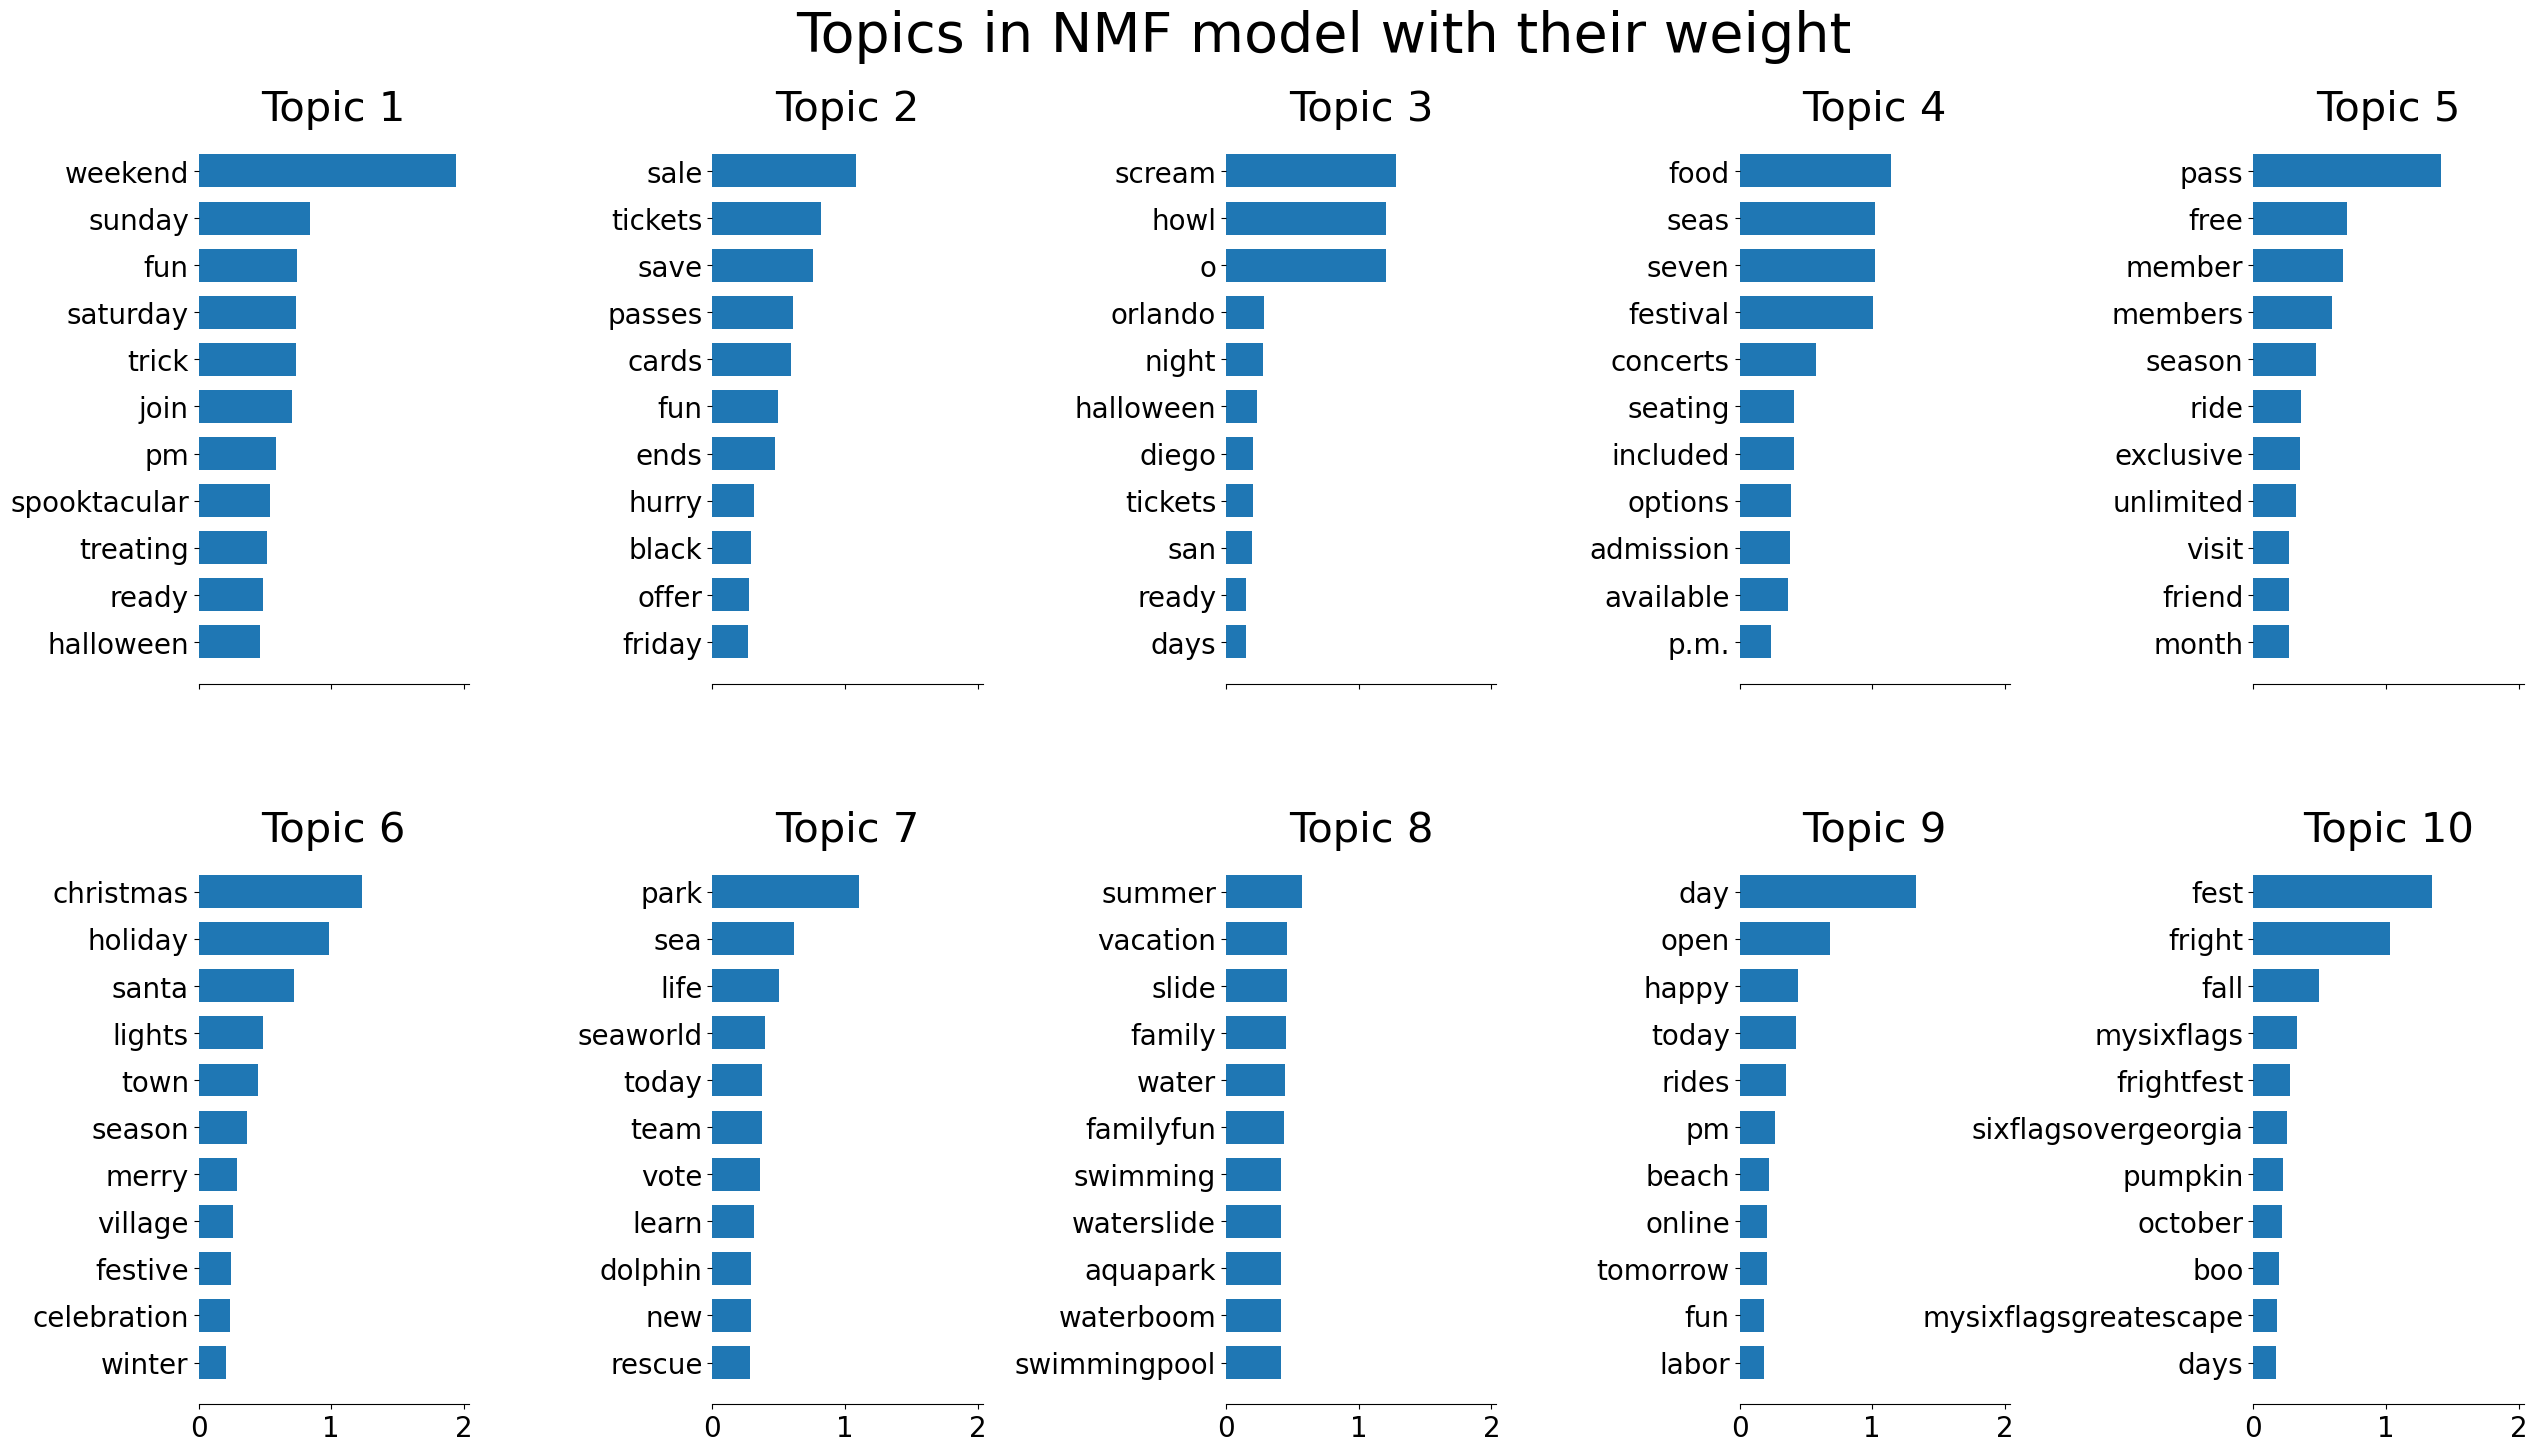

In [267]:
#by Damini
#visualization of topics
tfidf_feature_names = count_vectorizer.get_feature_names_out()
plot_top_words(
    model, tfidf_feature_names, 11, "Topics in NMF model with their weight"
)

In [268]:
def get_feature_names_out(model, n_top_words):
    '''This function takes a fitted NMF factorization model, and a n_top_words parameter.
    It then produces a dataframe where the columns are the topics that have been learned, and the
    rows are the top words that define the topic, ranked by their coefficients.
    '''

    feature_names = count_vectorizer.get_feature_names_out()
    d = {}
    for i in range(model.n_components):
        # model.components_ matrix contains the matrix H where topics are 
        words_ids = model.components_[i].argsort()[:-n_top_words - 1:-1]
        words = [feature_names[key] for key in words_ids]
        d['Topic' + '{:02d}'.format(i+1)] = words
    return pd.DataFrame(d)

In [269]:
#put topics in dataframe
topics=get_feature_names_out(model,11)
topics

,Topic01,Topic02,Topic03,Topic04,Topic05,Topic06,Topic07,Topic08,Topic09,Topic10
0,weekend,sale,scream,food,pass,christmas,park,summer,day,fest
1,sunday,tickets,howl,seas,free,holiday,sea,vacation,open,fright
2,fun,save,o,seven,member,santa,life,slide,happy,fall
3,saturday,passes,orlando,festival,members,lights,seaworld,family,today,mysixflags
4,trick,cards,night,concerts,season,town,today,water,rides,frightfest
5,join,fun,halloween,seating,ride,season,team,familyfun,pm,sixflagsovergeorgia
6,pm,ends,diego,included,exclusive,merry,vote,swimming,beach,pumpkin
7,spooktacular,hurry,tickets,options,unlimited,village,learn,waterslide,online,october
8,treating,black,san,admission,visit,festive,dolphin,aquapark,tomorrow,boo
9,ready,offer,ready,available,friend,celebration,new,waterboom,fun,mysixflagsgreatescape



topic 1 is not clear <br>
topic 2 is attractions/entertainment <br>
topic 3 is about tickets, Remuneration <br>
topic 4 is about promotions, Remuneration <br>
topic 5 is christmas / entertainment<br>
topic 6 is national holidays/ entertainment <br>
topic 7 is not clear <br>
topic 8 is ENTERTAINMENT <br>
topic 9 is halloween/entertainment </br>
topic 10 is time

changes:
ent cnc=ride
time come=weekend
hol today=year
hol park=new
time weather=summer
hol select=festival
hol delete:
admission

In [270]:
from itertools import chain

In [271]:
#make list of each topic
topic01= list(chain(*topics[['Topic05','Topic06','Topic09']].values.tolist()))
topic01
topic02= list(chain(*topics[['Topic02', 'Topic03','Topic04']].values.tolist()))
topic02

['pass',
 'christmas',
 'day',
 'free',
 'holiday',
 'open',
 'member',
 'santa',
 'happy',
 'members',
 'lights',
 'today',
 'season',
 'town',
 'rides',
 'ride',
 'season',
 'pm',
 'exclusive',
 'merry',
 'beach',
 'unlimited',
 'village',
 'online',
 'visit',
 'festive',
 'tomorrow',
 'friend',
 'celebration',
 'fun',
 'month',
 'winter',
 'labor']

['sale',
 'scream',
 'food',
 'tickets',
 'howl',
 'seas',
 'save',
 'o',
 'seven',
 'passes',
 'orlando',
 'festival',
 'cards',
 'night',
 'concerts',
 'fun',
 'halloween',
 'seating',
 'ends',
 'diego',
 'included',
 'hurry',
 'tickets',
 'options',
 'black',
 'san',
 'admission',
 'offer',
 'ready',
 'available',
 'friday',
 'days',
 'p.m.']

In [272]:
parks_us.head()

,Profile-ID,Profile,Target_group,Is_Target_group,Category,Is_Category,Country,State,City,Fans,...,Post-ID,Media_type,Is_Media_type,Date,Season,Message,Total_interaction,Post_interaction,Engagement,Facebook_post_Link
0,10625691462.0,Cedar Point,teenagers,2,Amusement park,1,United States,Ohio,Sandusky,1563890,...,10625691462_10158936706621463,photo,1,2022-07-21 00:05:00,Summer,"when you book a stay at hotel breakers, the fu...",339,0.000222,0.000222,https://www.facebook.com/cedarpoint/photos/a.3...
1,10625691462.0,Cedar Point,teenagers,2,Amusement park,1,United States,Ohio,Sandusky,1563890,...,10625691462_10158933698001463,post,2,2022-07-18 21:00:00,Summer,"it’s truce day at cedar point, and you’re invi...",348,0.000227,0.000227,https://www.facebook.com/10625691462/posts/101...
2,10625691462.0,Cedar Point,teenagers,2,Amusement park,1,United States,Ohio,Sandusky,1563890,...,10625691462_10158932110481463,photo,1,2022-07-17 18:42:00,Summer,curtis the cow is awful hungry at the barnyard...,446,0.000289,0.000289,https://www.facebook.com/cedarpoint/photos/a.3...
3,10625691462.0,Cedar Point,teenagers,2,Amusement park,1,United States,Ohio,Sandusky,1563890,...,10625691462_10158930461101463,photo,1,2022-07-16 15:16:00,Summer,"which team do you got on gemini?comment ""??"" f...",400,0.000267,0.000267,https://www.facebook.com/cedarpoint/photos/a.3...
4,10625691462.0,Cedar Point,teenagers,2,Amusement park,1,United States,Ohio,Sandusky,1563890,...,10625691462_10158929715101463,photo,1,2022-07-15 23:35:00,Summer,?announcing a new member of our social media t...,472,0.000313,0.000313,https://www.facebook.com/cedarpoint/photos/a.3...


In [273]:
#one hot encoding for messages that are topics
parks_us['Remuneration']=0
parks_us['Entertainment']=0



for i in range(len(parks_us)):
    for word in parks_us.loc[i,'Message'].split():
        if word in topic01:
            parks_us.loc[i,'Entertainment']=1
        elif word in topic02:
            parks_us.loc[i,'Remuneration']=1                                

In [274]:
#one hot encoding for messages that are not topics
parks_us['No_topic']=np.where((parks_us[['Entertainment','Remuneration']]==0).all(axis=1),1,0)



In [275]:
parks_us.sample(5)

,Profile-ID,Profile,Target_group,Is_Target_group,Category,Is_Category,Country,State,City,Fans,...,Date,Season,Message,Total_interaction,Post_interaction,Engagement,Facebook_post_Link,Remuneration,Entertainment,No_topic
4911,653316000000000.0,SkyPark at Santa's Village,families,1,Themed park,3,United States,California,Skyforest,54954,...,2022-04-10 17:01:00,Spring,follow the white rabbit to skypark for our eas...,37,0.001600,0.002058,https://www.facebook.com/653315854781004/posts...,0,0,1
3110,184020000000.0,Fun Spot America,teenagers,2,Amusement park,1,United States,Florida,Orlando,96536,...,2021-12-08 15:00:00,Winter,a reminder that our parks will be closed today...,83,0.000308,0.000562,https://www.facebook.com/184020466977/posts/10...,1,1,0
2475,18543728314.0,Busch Gardens Williamsburg,families,1,Themed park,3,United States,Virginia,Williamsburg,705679,...,2022-11-07 19:40:00,Fall,the countdown to christmas town preview weeken...,384,0.000567,0.000567,https://www.facebook.com/BuschGardensVA/photos...,1,1,0
3045,184020000000.0,Fun Spot America,teenagers,2,Amusement park,1,United States,Florida,Orlando,96536,...,2022-03-12 18:00:00,Spring,keeping the good times rolling at our mardi gr...,25,0.000308,0.000562,https://www.facebook.com/184020466977/posts/10...,0,0,1
4033,61119627598.0,Pacific Park,teenagers,2,Amusement park,1,United States,California,Santa Monica,55950,...,2022-07-12 20:01:00,Summer,#tastytuesday: pick up a yummy mocha frappucci...,25,0.000463,0.000463,https://www.facebook.com/pacificpark/photos/a....,0,0,1


In [276]:
parks_us[['Remuneration','Entertainment','No_topic']].value_counts()

Remuneration  Entertainment  No_topic
0             1              0           1842
              0              1           1754
1             1              0           1425
              0              0            670
Name: count, dtype: int64

In [277]:
parks_us.No_topic.value_counts()

No_topic
0    3937
1    1754
Name: count, dtype: int64

In [278]:
print(metrics.columns)


Index(['Profile', 'Target_group', 'Is_Target_group', 'Category', 'Is_Category',
       'City', 'State', 'Country', 'Fans', 'Post_interaction_(total_average)',
       'Engagement_(total_average)', 'Number_of_posts', 'Posts_by_fans',
       'Number_of_posts_(total)', 'Number_of_Reactions_(total)',
       'Number_of_Likes_(total)', 'Number_of_Comments_(total)',
       'Shares_per_post_(total average)', 'Comments_per_post_(total_average)',
       'Total_Reactions, Comments, Shares', 'Facebook_Link'],
      dtype='object')


# shrink dataset

In [279]:
#parks in US with text or photos that have a topic
parks_us = parks_us[(parks_us['No_topic'] == 0)]
parks_us.drop('No_topic',axis=1,inplace=True)
parks_us.index=range(len(parks_us))
parks_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3937 entries, 0 to 3936
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Profile-ID          3937 non-null   object        
 1   Profile             3937 non-null   object        
 2   Target_group        3937 non-null   object        
 3   Is_Target_group     3937 non-null   int64         
 4   Category            3937 non-null   object        
 5   Is_Category         3937 non-null   int64         
 6   Country             3937 non-null   object        
 7   State               3937 non-null   object        
 8   City                3937 non-null   object        
 9   Fans                3937 non-null   int64         
 10  Facebook_Link       3937 non-null   object        
 11  Post-ID             3937 non-null   object        
 12  Media_type          3937 non-null   object        
 13  Is_Media_type       3937 non-null   int64       

<Axes: xlabel='Post_interaction', ylabel='Count'>

(0.0, 0.005)

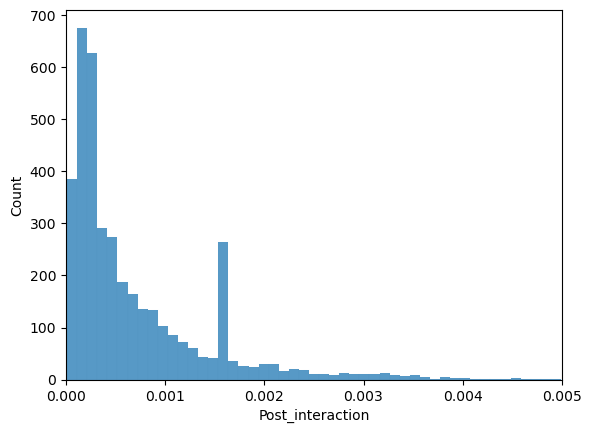

In [280]:
sns.histplot(data=parks_us,x='Post_interaction')
plt.xlim(0,0.005)
plt.show()

In [281]:
#Post_interaction checking
pst1= len(parks_us[parks_us['Post_interaction']>0.05])
print("Number of rows with Post_interaction over 0.05:",pst1)
pst2= len(parks_us[parks_us['Post_interaction']>0.04])
print("Number of rows with Post_interaction over 0.04:",pst2)
pst3= len(parks_us[parks_us['Post_interaction']>0.03])
print("Number of rows with Post_interaction over 0.03:",pst3)
pst4= len(parks_us[parks_us['Post_interaction']>0.02])
print("Number of rows with Post_interaction over 0.02:",pst4)
pst5= len(parks_us[parks_us['Post_interaction']>0.01])
print("Number of rows with Post_interaction over 0.01:",pst5)
pst6= len(parks_us[parks_us['Post_interaction']>0.004])
print("Number of rows with Post_interaction over 0.004:",pst6)
pst7= len(parks_us[parks_us['Post_interaction']>0.003])
print("Number of rows with Post_interaction over 0.003:",pst7)
pst8= len(parks_us[parks_us['Post_interaction']>0.002])
print("Number of rows with Post_interaction over 0.002:",pst8)
pst9= len(parks_us[parks_us['Post_interaction']<=0.002])
print("Number of rows with Post_interaction under 0.002:",pst9)
pst0= len(parks_us[parks_us['Post_interaction']<0.004])
print("Number of rows with Post_interaction under 0.004:",pst0)

Number of rows with Post_interaction over 0.05: 1
Number of rows with Post_interaction over 0.04: 2
Number of rows with Post_interaction over 0.03: 3
Number of rows with Post_interaction over 0.02: 6
Number of rows with Post_interaction over 0.01: 14
Number of rows with Post_interaction over 0.004: 67
Number of rows with Post_interaction over 0.003: 135
Number of rows with Post_interaction over 0.002: 288
Number of rows with Post_interaction under 0.002: 3649
Number of rows with Post_interaction under 0.004: 3870


In [282]:
#delete outliers
parks_us = parks_us[(parks_us['Post_interaction']<=0.002)]
parks_us.index=range(len(parks_us))
parks_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Profile-ID          3649 non-null   object        
 1   Profile             3649 non-null   object        
 2   Target_group        3649 non-null   object        
 3   Is_Target_group     3649 non-null   int64         
 4   Category            3649 non-null   object        
 5   Is_Category         3649 non-null   int64         
 6   Country             3649 non-null   object        
 7   State               3649 non-null   object        
 8   City                3649 non-null   object        
 9   Fans                3649 non-null   int64         
 10  Facebook_Link       3649 non-null   object        
 11  Post-ID             3649 non-null   object        
 12  Media_type          3649 non-null   object        
 13  Is_Media_type       3649 non-null   int64       

In [283]:
#Post_interaction
pst1= len(parks_us[parks_us['Post_interaction']>0.05])
print("Number of rows with Post_interaction over 0.05:",pst1)
pst2= len(parks_us[parks_us['Post_interaction']>0.04])
print("Number of rows with Post_interaction over 0.04:",pst2)
pst3= len(parks_us[parks_us['Post_interaction']>0.03])
print("Number of rows with Post_interaction over 0.03:",pst3)
pst4= len(parks_us[parks_us['Post_interaction']>0.02])
print("Number of rows with Post_interaction over 0.02:",pst4)
pst5= len(parks_us[parks_us['Post_interaction']>0.01])
print("Number of rows with Post_interaction over 0.01:",pst5)
pst6= len(parks_us[parks_us['Post_interaction']>0.004])
print("Number of rows with Post_interaction over 0.004:",pst6)
pst7= len(parks_us[parks_us['Post_interaction']>0.002])
print("Number of rows with Post_interaction over 0.002:",pst7)
pst8= len(parks_us[parks_us['Post_interaction']<=0.002])
print("Number of rows with Post_interaction under 0.002:",pst8)
pst9= len(parks_us[parks_us['Post_interaction']<0.004])
print("Number of rows with Post_interaction under 0.004:",pst9)

Number of rows with Post_interaction over 0.05: 0
Number of rows with Post_interaction over 0.04: 0
Number of rows with Post_interaction over 0.03: 0
Number of rows with Post_interaction over 0.02: 0
Number of rows with Post_interaction over 0.01: 0
Number of rows with Post_interaction over 0.004: 0
Number of rows with Post_interaction over 0.002: 0
Number of rows with Post_interaction under 0.002: 3649
Number of rows with Post_interaction under 0.004: 3649


In [284]:
parks_us['Target_group'].unique()
parks_us['Media_type'].unique()
parks_us['Category'].unique()
parks_us['Season'].unique()


array(['teenagers', 'families'], dtype=object)

array(['photo', 'post'], dtype=object)

array(['Amusement park', 'Marine-Life park', 'Themed park', 'Water park',
       'Historical park'], dtype=object)

array(['Summer', 'Spring', 'Winter', 'Fall'], dtype=object)

In [285]:
parks_us.Entertainment.value_counts()
parks_us.Remuneration.value_counts()


Entertainment
1    3033
0     616
Name: count, dtype: int64

Remuneration
1    1958
0    1691
Name: count, dtype: int64

# Final DataFrame
by Damini

In [286]:
parks_us.sample(5)

,Profile-ID,Profile,Target_group,Is_Target_group,Category,Is_Category,Country,State,City,Fans,...,Is_Media_type,Date,Season,Message,Total_interaction,Post_interaction,Engagement,Facebook_post_Link,Remuneration,Entertainment
3311,653316000000000.0,SkyPark at Santa's Village,families,1,Themed park,3,United States,California,Skyforest,54954,...,1,2022-01-06 01:02:00,Winter,the last storm of 2021 definitely went out wit...,227,0.001600,0.002058,https://www.facebook.com/skyparksantasvillage/...,0,1
2456,1782700000000000.0,SeaWorld Orlando,families,1,Marine-Life park,2,United States,Florida,Orlando,219997,...,2,2021-12-01 23:30:00,Winter,breaking news: join us for a performance by th...,371,0.001999,0.001999,https://www.facebook.com/1782696285170057/post...,1,1
1933,184020000000.0,Fun Spot America,teenagers,2,Amusement park,1,United States,Florida,Orlando,96536,...,2,2022-11-24 16:24:00,Fall,happy thanksgiving! we are open at 2pm today f...,27,0.000280,0.000280,https://www.facebook.com/184020466977/posts/10...,1,1
2299,1782700000000000.0,SeaWorld Orlando,families,1,Marine-Life park,2,United States,Florida,Orlando,219997,...,1,2022-11-19 15:40:00,Fall,christmas is in the air and we're enjoying the...,281,0.001322,0.001322,https://www.facebook.com/seaworldorlando/photo...,0,1
1825,18543728314.0,Busch Gardens Williamsburg,families,1,Themed park,3,United States,Virginia,Williamsburg,705679,...,1,2021-09-16 19:30:00,Fall,"fun, fear, and fright await tomorrow night (an...",538,0.000824,0.000824,https://www.facebook.com/BuschGardensVA/photos...,1,1


## columns of dataset:

| Column | Description |
|----------|-------------|
| Profile-ID | Facebook profile ID of the fanpage |
| Profile | Name of fanpage |
| Target_group | Target group of the theme park |
| Is_Target_group | Categorical value of the target group |
| Category | The type of theme park |
| Is_Category | Categorical value of the type of theme park |
| Country | The country in which the theme park is placed |
| State | The state in which the theme park is placed |
| City | The city in which the theme park is placed |
| Fans | Number of fans the fanpage has on Facebook |
| Facebook_Link | The link to the Facebook fanpage |
| Post_ID | Facebook post ID number of the post from the fanpage |
| Media_type | The media type of the post |
| Is_Media_type | Categorical value of the media type of the post |
| Date | The date of when the post was posted |
| Season | The season in which the post was posted |
| Message | The text that the post was including |
| Total_interaction | Sum of the count of reactions, shares and comments |
| Post_interaction | The average number of interactions on a profile's posts per follower per post |
| Engagement | The average number of interactions on a profile's posts per follower per day |
| Facebook_post_Link | The link to the Facebook post |
| Remuneration | Categorical value of post containing Remuneration words |
| Entertainment | Categorical value of post containing Holidays words |



## Variable summary:

| Variable | Description |
|----------|-------------|
| Is_Target_group | Categorical independent variable, indicates the target group of the theme park <br> families = 1, all ages <br> teenagers = 2, 12 and older years old <|
| Is_Category   | Categorical independent variable, indicates the category of the theme park <br>  Amusement park = 2, parks with roller coaters  <br> Marine-Life park = 4, parks with ocean/sea animals <br> Themed park = 5, parks with a specific theme  s <br> Historical park = 8, parks with historical stories/background  <br> Water park = 10, parks with only water atractions |
| Season | Categorical independent variable, indicates the season range of the post <br> Winter = December, January,    February <br> Spring = March, April, May <br> Summer = June, July, August <br> Fall = FSeptember, Oktober, November  |
| Is_Media_type  | Categorical independent variable, indicates the media type of the Facebook post <br> photo = 1, text only <br> post = 2, photo (with text) |
| Topic   | Categorical independent variable, indicates if the post contains a topic <br> contains topic = 1  <br> does not contain topic = 0 |

# EDA
by Damini

In [287]:
parks_us[['Profile','Target_group','Category','State','City','Media_type','Date','Season','Message']].describe()

,Date
count,3649
mean,2022-04-21 03:49:52.025212416
min,2021-08-20 00:00:00
25%,2021-12-14 22:32:00
50%,2022-04-14 20:39:00
75%,2022-09-10 19:38:00
max,2022-12-09 03:15:00


In [288]:
parks_us.describe()

,Is_Target_group,Is_Category,Fans,Is_Media_type,Date,Total_interaction,Post_interaction,Engagement,Remuneration,Entertainment
count,3649.000000,3649.000000,3.649000e+03,3649.000000,3649,3649.000000,3649.000000,3649.000000,3649.000000,3649.000000
mean,1.348315,2.214305,4.261855e+05,1.524253,2022-04-21 03:49:52.025212416,160.173198,0.000569,0.000605,0.536585,0.831187
min,1.000000,1.000000,2.550900e+04,1.000000,2021-08-20 00:00:00,0.000000,0.000012,0.000012,0.000000,0.000000
25%,1.000000,1.000000,8.219700e+04,1.000000,2021-12-14 22:32:00,27.000000,0.000187,0.000177,0.000000,1.000000
50%,1.000000,2.000000,2.199970e+05,2.000000,2022-04-14 20:39:00,86.000000,0.000360,0.000425,1.000000,1.000000
75%,2.000000,3.000000,6.657270e+05,2.000000,2022-09-10 19:38:00,194.000000,0.000822,0.000822,1.000000,1.000000
max,2.000000,5.000000,1.847816e+06,2.000000,2022-12-09 03:15:00,3050.000000,0.001999,0.002058,1.000000,1.000000
std,0.476502,1.173353,4.650715e+05,0.499480,NaN,229.509995,0.000495,0.000564,0.498728,0.374638


In [289]:
parks_us[['Is_Target_group','Is_Media_type','Entertainment','Remuneration','Post_interaction']].skew()

Is_Target_group     0.637012
Is_Media_type      -0.097167
Entertainment      -1.769003
Remuneration       -0.146795
Post_interaction    1.124908
dtype: float64

In [290]:
parks_us[['Is_Target_group','Is_Media_type','Entertainment','Remuneration','Post_interaction']].kurt()

Is_Target_group    -1.595090
Is_Media_type      -1.991650
Entertainment       1.129992
Remuneration       -1.979536
Post_interaction    0.123387
dtype: float64

In [291]:
one_count=parks_us[['Entertainment','Remuneration']]

In [292]:
import matplotlib.gridspec as gridspec

In [293]:

gs=gridspec.GridSpec(2,2)
fig=plt.figure(figsize=(15,5),dpi=1000)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[1,0])
ax4=fig.add_subplot(gs[1,1])


sns.histplot(data=parks_us[parks_us!=0],x='Entertainment',hue='Target_group',element="step",ax=ax1)
sns.histplot(data=parks_us[parks_us!=0],x='Remuneration',hue='Target_group',element="step",ax=ax2)


plt.show()

<Axes: xlabel='Entertainment', ylabel='Count'>

<Axes: xlabel='Remuneration', ylabel='Count'>

<Axes: xlabel='Is_Media_type', ylabel='Count'>

<Axes: xlabel='Is_Category', ylabel='Count'>

<Axes: xlabel='Post_interaction', ylabel='Count'>

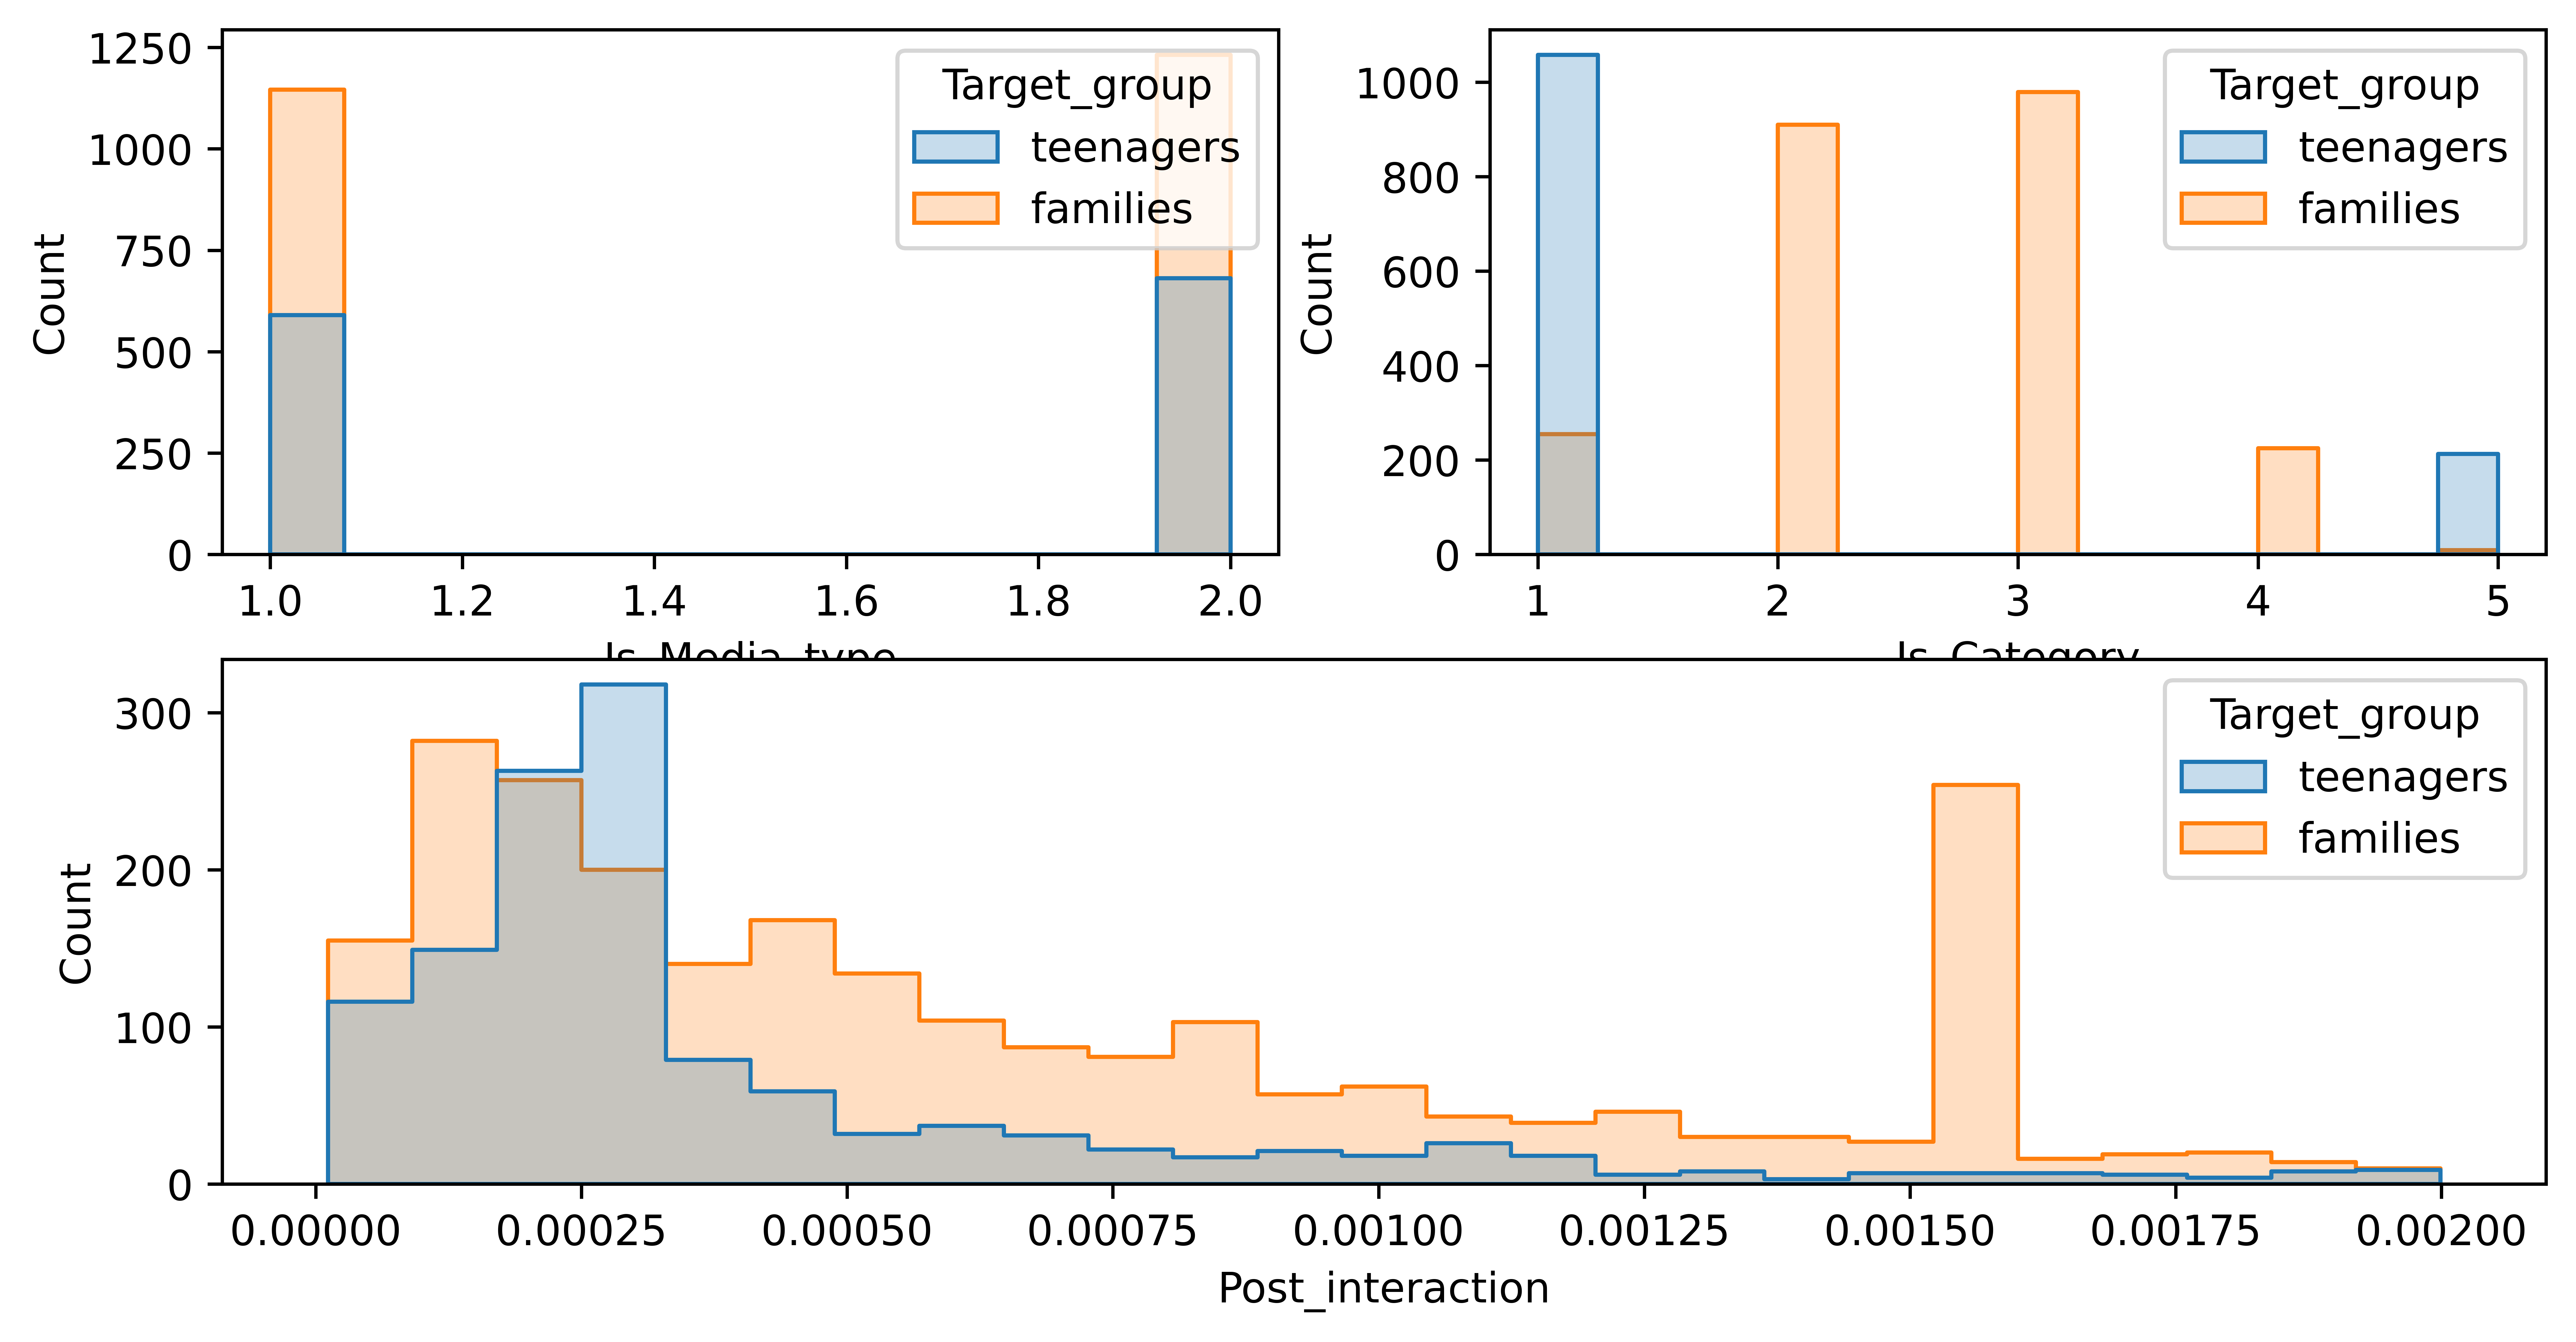

In [294]:

gs=gridspec.GridSpec(2,2)
fig=plt.figure(figsize=(10,5),dpi=1000)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[1,:])


sns.histplot(data=parks_us,x='Is_Media_type',hue="Target_group",element="step",ax=ax1)
sns.histplot(data=parks_us,x='Is_Category',hue="Target_group",element="step",ax=ax2)
sns.histplot(data=parks_us,x="Post_interaction",hue="Target_group",element="step",ax=ax3)

plt.show()


In [295]:
#check unique values and frequency
parks_us['Target_group'].value_counts()
parks_us['Category'].value_counts()
parks_us['Media_type'].value_counts()
parks_us['Season'].value_counts()

Target_group
families     2378
teenagers    1271
Name: count, dtype: int64

Category
Amusement park      1313
Themed park          979
Marine-Life park     910
Historical park      225
Water park           222
Name: count, dtype: int64

Media_type
post     1913
photo    1736
Name: count, dtype: int64

Season
Fall      1622
Winter     781
Spring     666
Summer     580
Name: count, dtype: int64

In [296]:
parks_us.groupby(['Category'])['Target_group'].value_counts().unstack()

Target_group,families,teenagers
Category,,
Amusement park,255.0,1058.0
Historical park,225.0,NaN
Marine-Life park,910.0,NaN
Themed park,979.0,NaN
Water park,9.0,213.0


In [297]:
parks_us.groupby(['Media_type'])['Target_group'].value_counts().unstack()

Target_group,families,teenagers
Media_type,,
photo,1146,590
post,1232,681


In [298]:
parks_us.groupby(['Season'])['Target_group'].value_counts().unstack()

Target_group,families,teenagers
Season,,
Fall,999,623
Spring,491,175
Summer,378,202
Winter,510,271


C:\Users\olgal\AppData\Local\Temp\ipykernel_43752\740005168.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



[Text(0, 0, '0.045%'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '0.041%'),
 Text(0, 0, '')]

[Text(0, 0, '0.039%'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '0.028%'),
 Text(0, 0, '')]

[Text(0, 0, '0.023%'),
 Text(0, 0, '0.081%'),
 Text(0, 0, '0.086%'),
 Text(0, 0, '0.054%'),
 Text(0, 0, '0.043%')]

[Text(0, 0, '0.026%'),
 Text(0, 0, '0.079%'),
 Text(0, 0, '0.054%'),
 Text(0, 0, '0.035%'),
 Text(0, 0, '0.035%')]

Text(0.5, 0.98, 'Post interaction of theme parks for Media type')

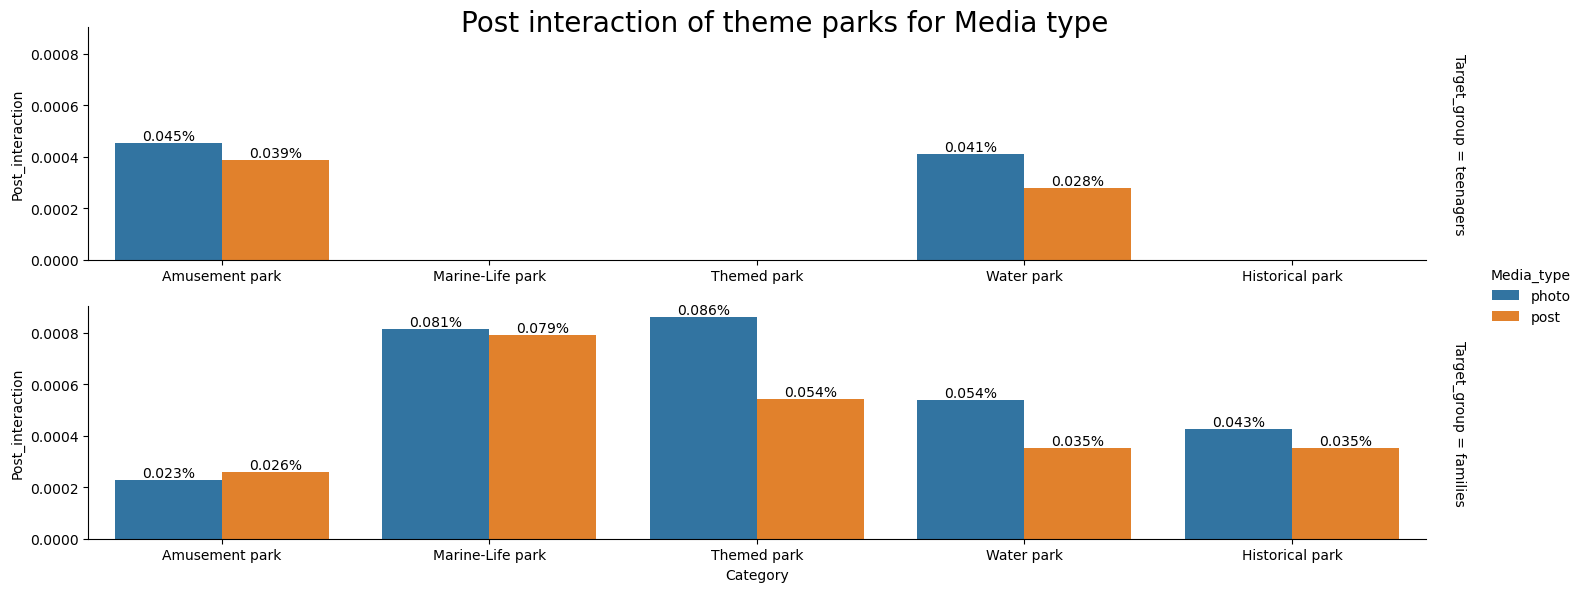

In [299]:
#plot per target group
fam = sns.catplot(data=parks_us, hue='Media_type',x='Category', y='Post_interaction',row='Target_group', kind='bar', height=3,aspect=5,margin_titles=True,ci=None)

for ax in fam.axes.ravel():
    for i in ax.containers:
        format=  [f'{(v.get_height()*100):.3f}%' for v in i]
        ax.bar_label(i,labels=format, label_type='edge')
    ax.tick_params(labelbottom=True)

fam.fig.subplots_adjust(top=0.95,hspace=0.2)
fam.fig.suptitle('Post interaction of theme parks for Media type', fontsize=20)

C:\Users\olgal\AppData\Local\Temp\ipykernel_43752\503532303.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



[Text(0, 0, '0.044%'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '0.044%'),
 Text(0, 0, '')]

[Text(0, 0, '0.048%'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '0.028%'),
 Text(0, 0, '')]

[Text(0, 0, '0.040%'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '0.029%'),
 Text(0, 0, '')]

[Text(0, 0, '0.040%'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '0.034%'),
 Text(0, 0, '')]

[Text(0, 0, '0.021%'),
 Text(0, 0, '0.076%'),
 Text(0, 0, '0.046%'),
 Text(0, 0, ''),
 Text(0, 0, '0.034%')]

[Text(0, 0, '0.024%'),
 Text(0, 0, '0.074%'),
 Text(0, 0, '0.069%'),
 Text(0, 0, '0.054%'),
 Text(0, 0, '0.038%')]

[Text(0, 0, '0.027%'),
 Text(0, 0, '0.090%'),
 Text(0, 0, '0.095%'),
 Text(0, 0, ''),
 Text(0, 0, '0.023%')]

[Text(0, 0, '0.023%'),
 Text(0, 0, '0.080%'),
 Text(0, 0, '0.066%'),
 Text(0, 0, '0.035%'),
 Text(0, 0, '0.044%')]

Text(0.5, 0.98, 'Post interaction of theme parks for sesonality')

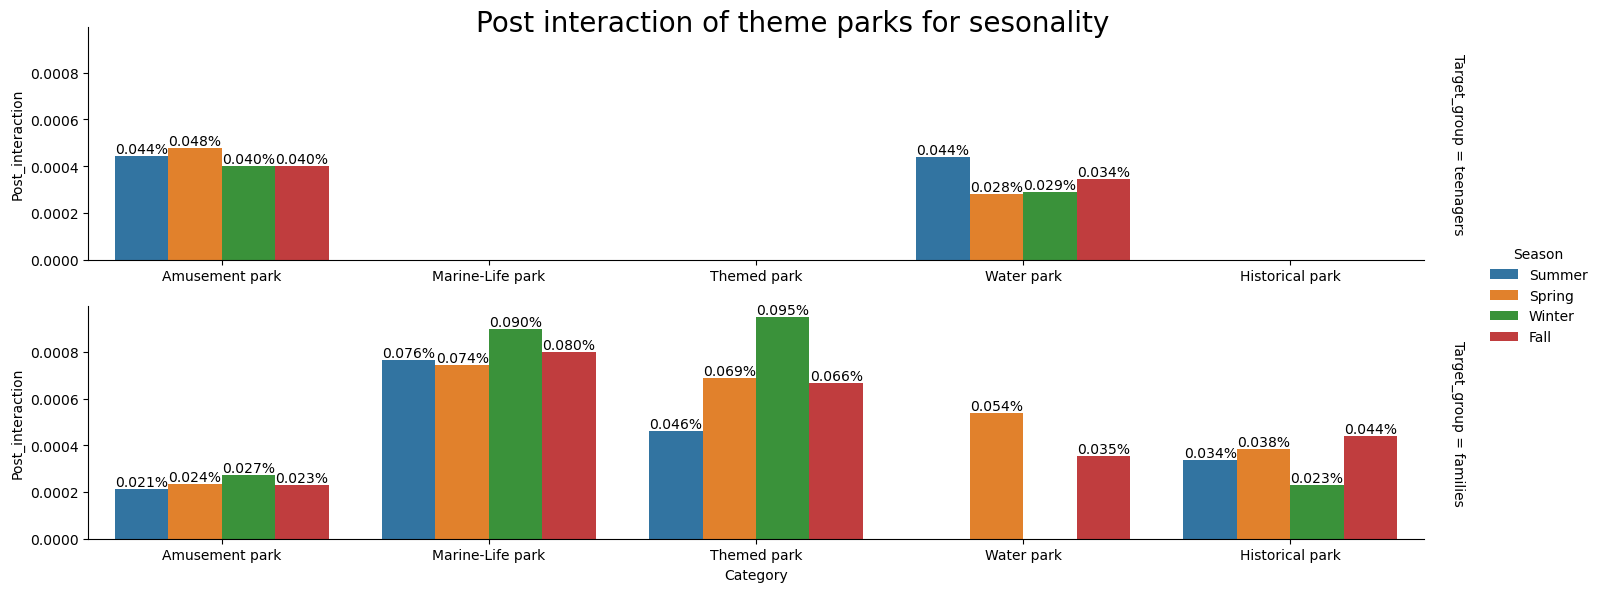

In [300]:
#plot per target group
fam = sns.catplot(data=parks_us, hue='Season',x='Category', y='Post_interaction',row='Target_group', kind='bar', height=3,aspect=5,margin_titles=True,ci=None)

for ax in fam.axes.ravel():
    for i in ax.containers:
        format=  [f'{(v.get_height()*100):.3f}%' for v in i]
        ax.bar_label(i,labels=format, label_type='edge')
    ax.tick_params(labelbottom=True)

fam.fig.subplots_adjust(top=0.95,hspace=0.2)
fam.fig.suptitle('Post interaction of theme parks for sesonality', fontsize=20)

# Analysis

## Correlations
by Damini

In [301]:
#pearson
parks_us[['Is_Target_group','Is_Category','Is_Media_type','Entertainment','Remuneration','Entertainment','Post_interaction']].corr('pearson')

,Is_Target_group,Is_Category,Is_Media_type,Entertainment,Remuneration,Entertainment,Post_interaction
Is_Target_group,1.000000,-0.338977,0.016901,0.059214,-0.063442,0.059214,-0.242142
Is_Category,-0.338977,1.000000,0.057547,-0.014335,0.053116,-0.014335,0.063085
Is_Media_type,0.016901,0.057547,1.000000,-0.024992,0.036878,-0.024992,-0.117617
Entertainment,0.059214,-0.014335,-0.024992,1.000000,-0.418812,1.000000,0.012335
Remuneration,-0.063442,0.053116,0.036878,-0.418812,1.000000,-0.418812,-0.051137
Entertainment,0.059214,-0.014335,-0.024992,1.000000,-0.418812,1.000000,0.012335
Post_interaction,-0.242142,0.063085,-0.117617,0.012335,-0.051137,0.012335,1.000000


<Axes: >

Text(0.5, 1.0, 'Pearson Correlation matrix of attributes')

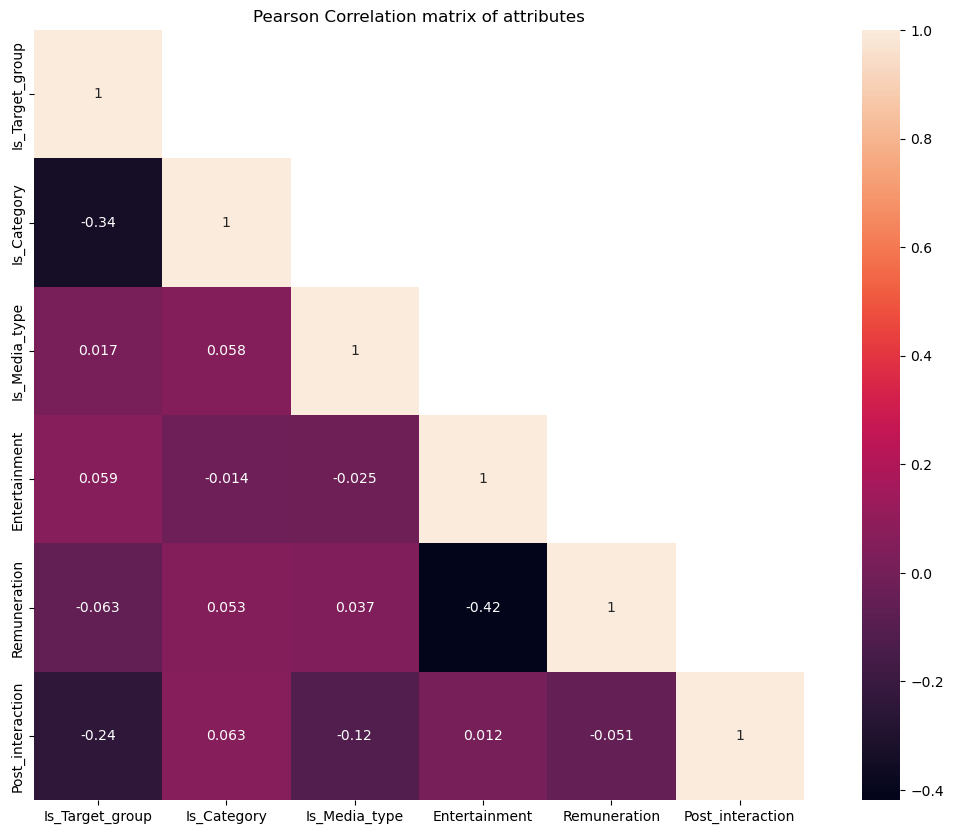

In [302]:
#correlation matrix pearson
pears=parks_us[['Is_Target_group','Is_Category','Is_Media_type','Entertainment','Remuneration','Post_interaction']].corr('pearson')
mask=np.array(pears)
mask[np.tril_indices_from(mask)]=False
#heatmap for correlation
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(pears, mask=mask,square=True,annot=True,ax=ax)
ax.set_title('Pearson Correlation matrix of attributes')
plt.show()

In [303]:
#spearman
parks_us[['Is_Target_group','Is_Category','Is_Media_type','Entertainment','Remuneration','Post_interaction']].corr('spearman')

,Is_Target_group,Is_Category,Is_Media_type,Entertainment,Remuneration,Post_interaction
Is_Target_group,1.000000,-0.496236,0.016901,0.059214,-0.063442,-0.231041
Is_Category,-0.496236,1.000000,0.058370,-0.019173,0.063761,0.103667
Is_Media_type,0.016901,0.058370,1.000000,-0.024992,0.036878,-0.100922
Entertainment,0.059214,-0.019173,-0.024992,1.000000,-0.418812,0.001216
Remuneration,-0.063442,0.063761,0.036878,-0.418812,1.000000,-0.046337
Post_interaction,-0.231041,0.103667,-0.100922,0.001216,-0.046337,1.000000


<Axes: >

Text(0.5, 1.0, 'Spearman Correlation matrix of attributes')

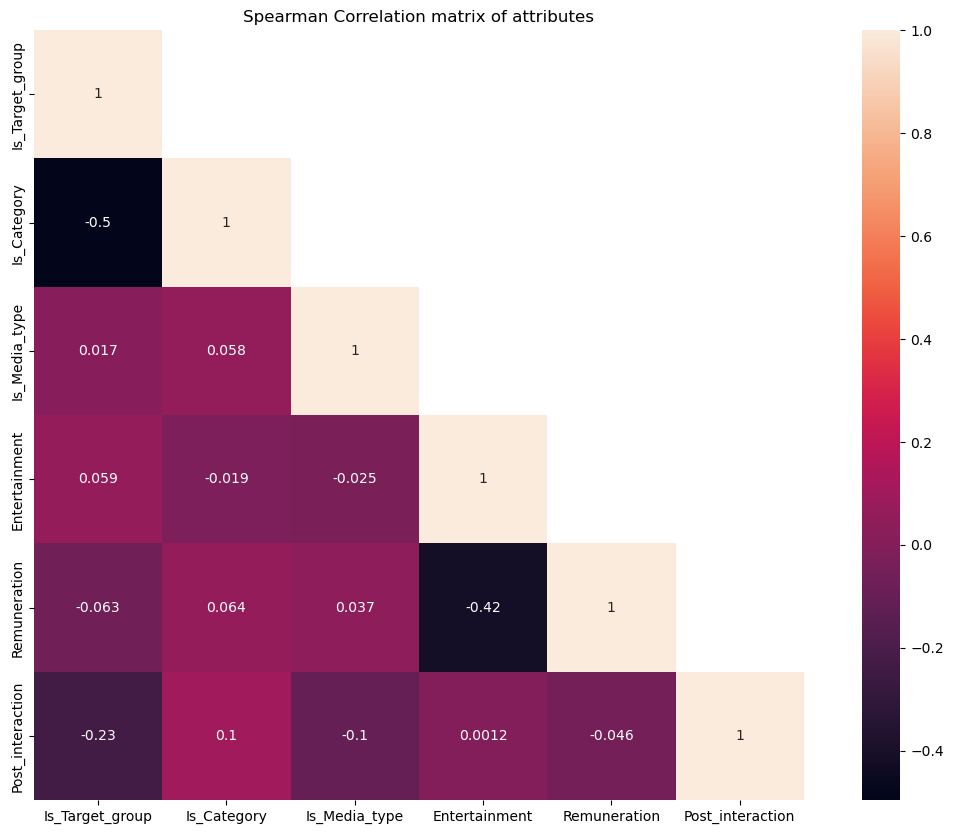

In [304]:
#correlation matrix spearman
spear=parks_us[['Is_Target_group','Is_Category','Is_Media_type','Entertainment','Remuneration','Post_interaction']].corr('spearman')
mask=np.array(spear)
mask[np.tril_indices_from(mask)]=False
#heatmap for correlation
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(spear, mask=mask,square=True,annot=True,ax=ax)
ax.set_title('Spearman Correlation matrix of attributes')
plt.show()

# Hypothesis testing
<p>by Mallika </p>

### H1. Photo-based media post type has higher impact on consumer engagement
#### H₀: There is no significant difference in consumer engagement between photo and text posts i.e. b1 = 0
#### Ha: Photo posts have higher consumer engagement compared to text posts i.e. b1 != 0

First of all to check which test is suitable we check if the residue of 'Media_tye' and 'Post_interaction' is normally distributed by using a linear regression model

In [305]:
import numpy as np
from statsmodels.formula.api import ols
from scipy import stats

#### Using linear model

In [306]:
y_, _ = stats.boxcox(parks_us['Post_interaction'] + 1e-9)
parks_us['Post_interaction_normal'] = y_
parks_copy = parks_us.copy()


# Mapping 'photo' to 1 and 'post' to 0
parks_copy['Medial_type_encoded'] = parks_copy['Media_type'].map({'photo':1,'post':0})

In [307]:
# Creating the feature matrix 'X' and target array 'y' for the linear regression model
X = parks_copy['Medial_type_encoded'].to_numpy().reshape(-1, 1)
y = parks_copy['Post_interaction_normal'].to_numpy()

<Figure size 500x300 with 0 Axes>

Text(0.5, 0, 'Is media type')

Text(0, 0.5, 'Post interaction')

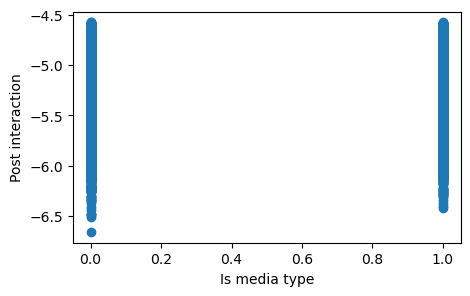

In [308]:
# Creating a scatter plot to visualize the relationship between X and y
plt.figure(figsize=(5, 3))
plt.scatter(X, y)
plt.xlabel("Is media type")
plt.ylabel("Post interaction")
plt.show()

Since we are plotting  a binary variable against a continuous variables, we have two clusters of values at 0 and 1.

In [309]:
# Calculate the intercept (b0) and coffecients (b1) 
from sklearn.linear_model import LinearRegression

model1 = LinearRegression().fit(X, y)
b0=model1.intercept_
b1=model1.coef_

print ("b0 = ", b0)
print ("b1 = ", b1)

# Calculating the coefficient of determination (R-squared)
r_sq = model1.score(X, y)
print("coefficent of determination is ", r_sq)

b0 =  -5.3914142405871015
b1 =  [0.08677439]
coefficent of determination is  0.010904284032067113


We get positive value of b1 which means photo post type has a positive influence on customer engagement. 

However, r**2 value is lower, suggesting that the dynamics of interaction between the two variables are not sufficiently captured by a linear model.

In [310]:
# Calculating the residue
y_pred = model1.predict(X)
residuals = y - y_pred

<Figure size 500x300 with 0 Axes>

<Axes: >

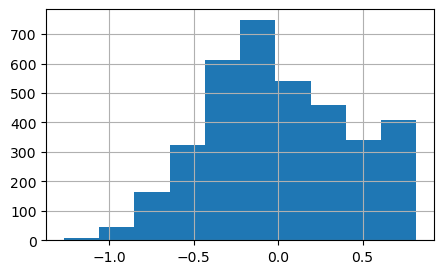

In [311]:
# Check normality of the residue
plt.figure(figsize=(5, 3))
pd.Series(residuals).hist()

In [312]:
# Calculating the mean of the residue
round(np.mean(residuals),4)

-0.0

<Figure size 500x300 with 0 Axes>

Text(0.5, 0, 'Residuals')

Text(0, 0.5, 'Post interaction')

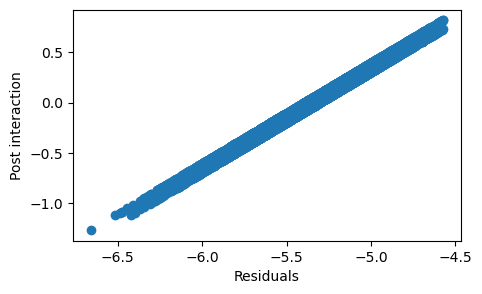

In [313]:
# Creating a scatter plot to check equality of variance
plt.figure(figsize=(5, 3))
plt.scatter(y, residuals)
plt.xlabel("Residuals")
plt.ylabel("Post interaction")
plt.show()

In [314]:
# Calculating SSE and MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y, y_pred)
print("SSE = ", MSE*len(y))
MSE = MSE*len(y)/(len(y)-2)
print("MSE = ", MSE)

SSE =  621.6058999956488
MSE =  0.17044307650004079


In [315]:
# Calculating the MSR
SSR = 0
y_avg = np.mean(y)
for i in y_pred:
    SSR = SSR + ((i-y_avg)*(i-y_avg))
MSR = SSR/1
print ("MSR = ", MSR)

MSR =  6.8528931832731965


In [316]:
# Calculating the F-statistics
F = MSR/MSE
print(F)

40.206345273705246


The F-statistics indicates that the model is a good fit. Therefore, from b1 coffecient above we can conclude that "Photo-based media post type has higher impact on customer engagement"

### H2. Customer Engagement level vary significantly between weekday and weekends
#### H₀: The timing of posts (weekday vs. weekend) does not significantly affect consumer engagement.
#### Ha: Posts posted on weekends havesignificant affect compared to posts posted on weekdays.


In [317]:
parks_us['Date'] = pd.to_datetime(parks_us['Date'])

In [318]:
# Extract the day of the week from the 'Date' column
day_of_week = parks_us['Date'].dt.day_name()
# Create a new column 'weekend' based on whether the day is a Saturday or Sunday
parks_us['weekend'] = day_of_week.apply(lambda x: True if x in ['Saturday', 'Sunday'] else False).astype(int)
parks_us['weekend']

0       0
1       0
2       1
3       0
4       0
       ..
3644    0
3645    0
3646    1
3647    1
3648    0
Name: weekend, Length: 3649, dtype: int32

In [319]:
parks_us['weekend'].value_counts()

weekend
0    2700
1     949
Name: count, dtype: int64

In [320]:
parks_copy = parks_us.copy()

In [321]:
engagement_target = []
# Group the 'parks_copy' DataFrame by the 'weekend' column
for _, group in parks_copy.groupby('weekend'):
    engagement_target.append(group['Post_interaction_normal'])

<Figure size 500x300 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Weekend')

Text(0, 0.5, 'Post interaction')

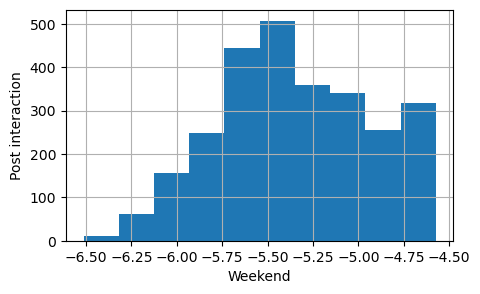

In [322]:
#check normality of weekend
plt.figure(figsize=(5, 3))
engagement_target[0].hist()
plt.xlabel('Weekend')
plt.ylabel('Post interaction')

<Figure size 500x300 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Weekday')

Text(0, 0.5, 'Post interaction')

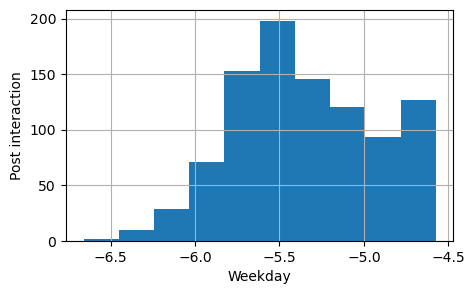

In [323]:
# Check normality of Weekday
plt.figure(figsize=(5, 3))
engagement_target[1].hist()
plt.xlabel('Weekday')
plt.ylabel('Post interaction')

In [324]:
# checking variance
engagement_target[0].std(), engagement_target[1].std()

(0.41618498235559576, 0.41199454941467295)

In [325]:
# using two sample t-test
stat, p = stats.ttest_ind(*engagement_target, equal_var=True)
print(p)
alpha = 0.05
if p < alpha: 
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.5823930331119849
accept null hypothesis


### H3: The engagement levels for theme parks on social media platforms vary significantly across different seasons. 

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Engagement', ylabel='Count'>

<Axes: xlabel='Engagement', ylabel='Count'>

<Axes: xlabel='Engagement', ylabel='Count'>

<Axes: xlabel='Engagement', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Engagement Levels by Season')

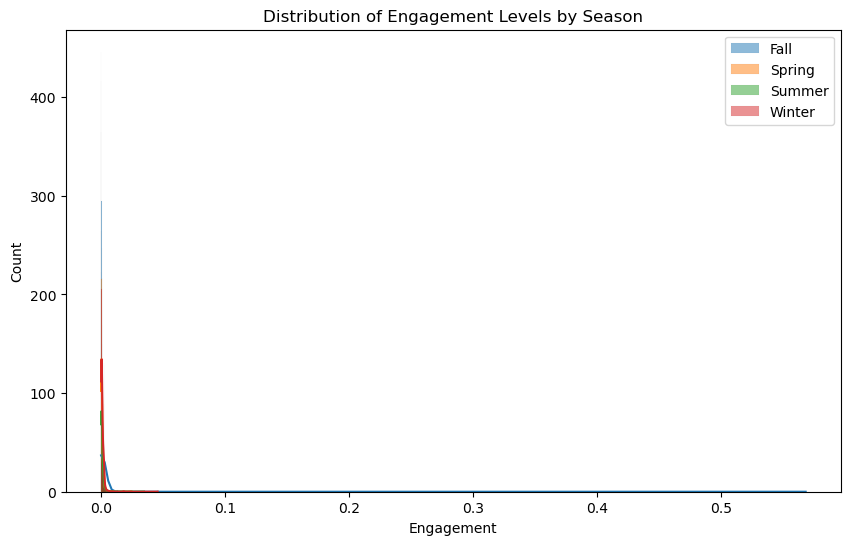

In [326]:
#Normality
plt.figure(figsize=(10, 6))
for season, group in df.groupby('Season'):
    sns.histplot(group['Engagement'], kde=True, label=season)
plt.title('Distribution of Engagement Levels by Season')
plt.legend()
plt.show()

In [327]:

from scipy.stats import f_oneway

# Extract engagement levels and season data
engagement_by_season = df.groupby('Season')['Engagement'].mean()

# Perform ANOVA test
f_statistic, p_value = f_oneway(*[group['Engagement'] for season, group in df.groupby('Season')])

# Print results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: Engagement levels vary significantly across seasons.")
else:
    print("Fail to reject null hypothesis: No significant difference in engagement levels.")


F-statistic: 0.5423679413106023
p-value: 0.6532780145926276
Fail to reject null hypothesis: No significant difference in engagement levels.


In [328]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test
h_statistic, p_value = kruskal(*[group['Engagement'] for season, group in df.groupby('Season')])

# Print results
print("H-statistic:", h_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: Engagement levels vary significantly across seasons.")
else:
    print("Fail to reject null hypothesis: No significant difference in engagement levels.")


H-statistic: 11.61149743606793
p-value: 0.00883971598663008
Reject null hypothesis: Engagement levels vary significantly across seasons.


In [329]:
from itertools import combinations
from scipy.stats import mannwhitneyu

seasons = parks_us['Season'].unique()
combinations_seasons = combinations(seasons, 2)

alpha = 0.05

for season1, season2 in combinations_seasons:
    group1 = parks_us[parks_us['Season'] == season1]['Engagement']
    group2 = parks_us[parks_us['Season'] == season2]['Engagement']
    
    statistic, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
    
    if p_value < alpha:
        print(f"Engagement levels between {season1} and {season2} are significantly different.")
    else:
        print(f"No significant difference in engagement levels between {season1} and {season2}.")


Engagement levels between Summer and Spring are significantly different.
Engagement levels between Summer and Winter are significantly different.
No significant difference in engagement levels between Summer and Fall.
No significant difference in engagement levels between Spring and Winter.
No significant difference in engagement levels between Spring and Fall.
Engagement levels between Winter and Fall are significantly different.


In [330]:
from scipy.stats import ttest_ind

# Separate the data into two groups based on content type
entertainment_group = parks_us[parks_us['Entertainment'] == 1]['Engagement']
remuneration_group = parks_us[parks_us['Remuneration'] == 1]['Engagement']

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(entertainment_group, remuneration_group, equal_var=False)

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: Content types significantly affect consumer engagement.")
else:
    print("Fail to reject null hypothesis: No significant difference in engagement based on content types.")


t-statistic: 1.8446817296201814
p-value: 0.06515212050632808
Fail to reject null hypothesis: No significant difference in engagement based on content types.


### H4 The type of content (entertainment or remuneration) does not have a significant impact on consumer engagement for theme parks on social media platforms. 

In [331]:
from scipy.stats import ttest_ind

# Separate the data into two groups based on content type
entertainment_group = parks_us[parks_us['Entertainment'] == 1]['Engagement']
remuneration_group = parks_us[parks_us['Remuneration'] == 1]['Engagement']

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(entertainment_group, remuneration_group)

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: Content types significantly affect consumer engagement.")
else:
    print("Fail to reject null hypothesis: No significant difference in consumer engagement.")


t-statistic: 1.8243474356791467
p-value: 0.06815934636344546
Fail to reject null hypothesis: No significant difference in consumer engagement.


<Figure size 1200x500 with 0 Axes>

<Axes: >

(array([220., 125., 140.,  50.,  49.,  37.,  29.,  21.,  10., 100.]),
 array([2.0700000e-05, 2.2438130e-04, 4.2806260e-04, 6.3174390e-04,
        8.3542520e-04, 1.0391065e-03, 1.2427878e-03, 1.4464691e-03,
        1.6501504e-03, 1.8538317e-03, 2.0575130e-03]),
 <BarContainer object of 10 artists>)

(array([519., 309., 273., 158.,  93.,  70.,  45.,  45.,  27.,  83.]),
 array([1.1500000e-05, 2.1610130e-04, 4.2070260e-04, 6.2530390e-04,
        8.2990520e-04, 1.0345065e-03, 1.2391078e-03, 1.4437091e-03,
        1.6483104e-03, 1.8529117e-03, 2.0575130e-03]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Histograms')

<Axes: >

((array([-3.12563148, -2.8547873 , -2.70326543, -2.59621113, -2.51257285,
         -2.44351267, -2.38444979, -2.33269221, -2.28651875, -2.24475988,
         -2.20658344, -2.17137551, -2.13866978, -2.10810342, -2.07938838,
         -2.05229202, -2.02662367, -2.002225  , -1.9789631 , -1.95672521,
         -1.93541486, -1.91494882, -1.8952548 , -1.87626954, -1.85793743,
         -1.84020924, -1.82304123, -1.80639431, -1.79023343, -1.77452702,
         -1.75924656, -1.74436615, -1.72986227, -1.71571341, -1.70189991,
         -1.68840373, -1.67520825, -1.66229818, -1.64965937, -1.6372787 ,
         -1.62514404, -1.61324406, -1.60156824, -1.59010676, -1.57885045,
         -1.56779069, -1.55691945, -1.54622916, -1.53571271, -1.52536341,
         -1.51517495, -1.5051414 , -1.49525712, -1.48551681, -1.47591543,
         -1.46644821, -1.45711063, -1.4478984 , -1.43880743, -1.42983384,
         -1.42097394, -1.41222419, -1.40358125, -1.3950419 , -1.38660308,
         -1.37826187, -1.37001546, -1.

Text(0.5, 1.0, 'Q-Q Plot Group 1')

<Figure size 1200x500 with 0 Axes>

<Axes: >

((array([-3.3345096 , -3.0794068 , -2.93766882, ...,  2.93766882,
          3.0794068 ,  3.3345096 ]),
  array([1.150000e-05, 1.840000e-05, 2.070000e-05, ..., 2.057513e-03,
         2.057513e-03, 2.057513e-03])),
 (0.0004806530346606985, 0.0005698338692971641, 0.9116710048385726))

Text(0.5, 1.0, 'Q-Q Plot Group 2')

<Figure size 800x500 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x1feeee51850>,
 'caps': [<matplotlib.lines.Line2D at 0x1feeee0e610>,
 'boxes': [<matplotlib.lines.Line2D at 0x1feeee51c40>,
 'medians': [<matplotlib.lines.Line2D at 0x1feeee0ea30>,
 'fliers': [<matplotlib.lines.Line2D at 0x1feeee0ed30>,
 'means': []}

Text(0.5, 1.0, 'Boxplots')

Levene's Test p-value: 1.2543378196738845e-09


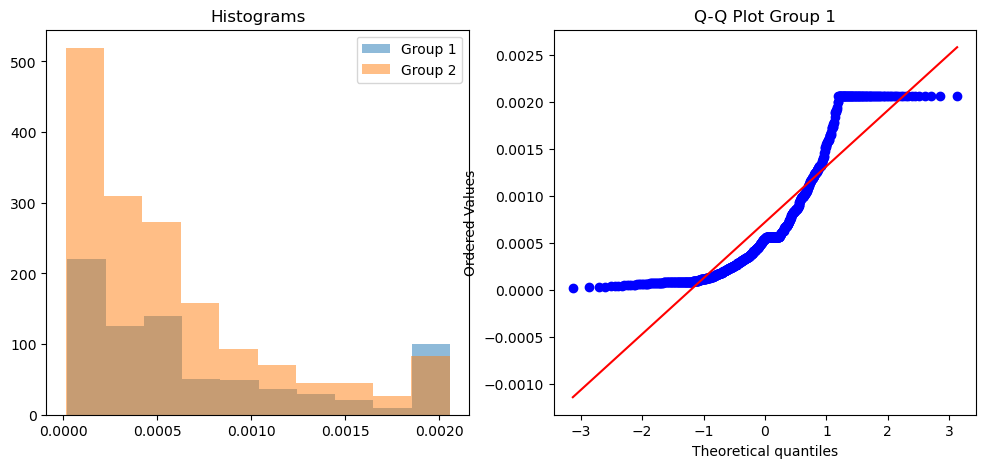

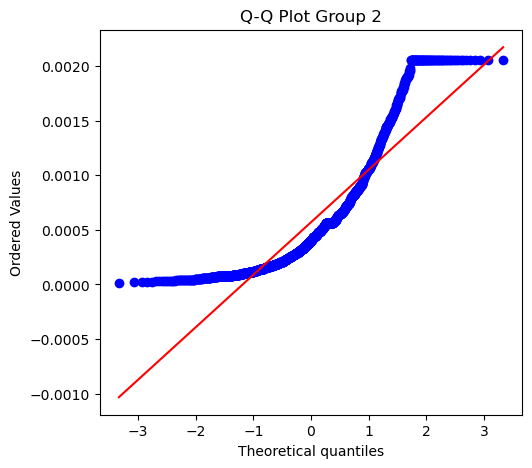

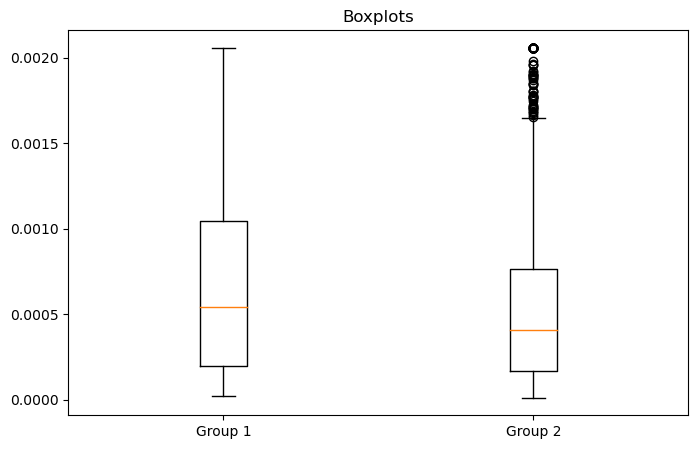

In [332]:


# Normality Assumption
# Check normality using histograms and Q-Q plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(group1, alpha=0.5, label='Group 1')
plt.hist(group2, alpha=0.5, label='Group 2')
plt.title('Histograms')
plt.legend()

plt.subplot(1, 2, 2)
stats.probplot(group1, plot=plt)
plt.title('Q-Q Plot Group 1')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
stats.probplot(group2, plot=plt)
plt.title('Q-Q Plot Group 2')

#

# Homogeneity of Variance Assumption
# Check variance using boxplots and Levene's test
plt.figure(figsize=(8, 5))
plt.boxplot([group1, group2], labels=['Group 1', 'Group 2'])
plt.title('Boxplots')

levene_test = stats.levene(group1, group2)
print("Levene's Test p-value:", levene_test.pvalue)


## H5



In [340]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'data' is your DataFrame containing the data
model = smf.mixedlm("Engagement ~ Target_group", parks_us, groups=parks_us["Target_group"])
result = model.fit()

print(result.summary())


               Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     Engagement
No. Observations:     3649        Method:                 REML      
No. Groups:           2           Scale:                  0.0000    
Min. group size:      1271        Log-Likelihood:         22187.3274
Max. group size:      2378        Converged:              Yes       
Mean group size:      1824.5                                        
--------------------------------------------------------------------
                          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------
Intercept                  0.001    0.001  1.261 0.207 -0.000  0.002
Target_group[T.teenagers] -0.000    0.001 -0.330 0.741 -0.002  0.001
Group Var                  0.000 8159.269                           



c:\Users\olgal\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


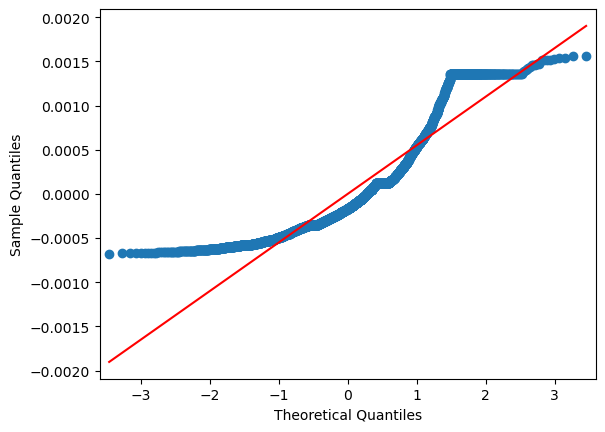

Text(0.5, 1.0, 'Q-Q Plot for Normality of Residuals')

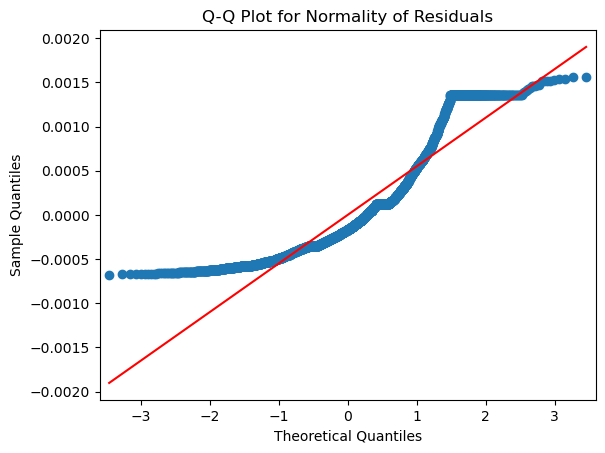

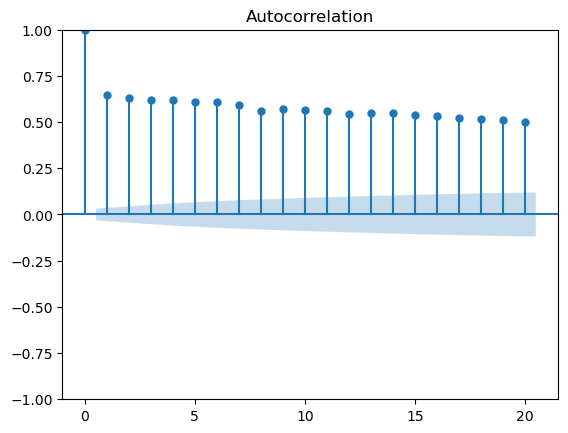

Text(0.5, 1.0, 'Autocorrelation of Residuals')

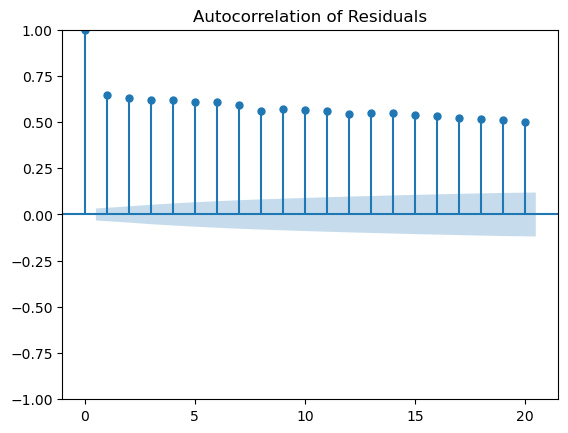

In [343]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Residual analysis
residuals = result.resid
predicted_values = result.fittedvalues


# Normality of Residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot for Normality of Residuals')
plt.show()

# Independence of Residuals
sm.graphics.tsa.plot_acf(residuals, lags=20)
plt.title('Autocorrelation of Residuals')
plt.show()



### H6

In [368]:
# Fit the mixed-effects model
formula = 'Engagement ~ Category'
model = mixedlm(formula, data=parks_us, groups=parks_us['Category'])
result = model.fit()


c:\Users\olgal\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


In [369]:
# Print the summary of the mixed-effects ANOVA
print(result.summary())

                 Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      Engagement
No. Observations:       3649         Method:                  REML      
No. Groups:             5            Scale:                   0.0000    
Min. group size:        222          Log-Likelihood:          22343.4594
Max. group size:        1313         Converged:               Yes       
Mean group size:        729.8                                           
------------------------------------------------------------------------
                             Coef.   Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                     0.000     0.001  0.810 0.418 -0.001  0.001
Category[T.Historical park]  -0.000     0.001 -0.169 0.866 -0.002  0.001
Category[T.Marine-Life park]  0.000     0.001  0.511 0.610 -0.001  0.002
Category[T.Themed park]       0.000     0.001  0.514 0.607 -0.001  0.